### 필요 라이브러리 로드

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pd.set_option('display.max_columns',500) 
#출력시 생략 X

### 데이터셋 설정 

In [4]:
#df=pd.read_excel("BG_Dataset/BG_sample24.xlsx")
#df=pd.read_csv("BG_Dataset/BG_sample46.csv")
df = pd.read_excel("/content/drive/MyDrive/BG_Dataset/BG_sample4.xlsx")
#df = pd.read_csv("/content/drive/MyDrive/BG_Dataset/BG_Sample46.csv")

In [5]:
df.shape

(1987, 14)

In [6]:
#df[]

In [7]:
#필요없는 열 제거
cols = ['색인', '이벤트 하위 유형', '환자 정보', '장치 정보', '소스 장치 ID', '기간(hh:mm:ss)', '포도당 변화율 (mg/dL/min)', '트랜스미터 시간 (배장 정수)', '트랜스미터 ID']
df.drop(cols, axis=1, inplace=True)


In [8]:
df=df.rename({'타임스탬프(YYYY-MM-DDThh:mm:ss)':'Timestamp','포도당 값 (mg/dL)':'Glucose','이벤트 유형':'Event',
             '인슐린 값(u)':'Insulin','탄수화물 값 (그램)':'Meal'},axis='columns')

In [9]:
df['Event'].value_counts()

EGV     1911
교정        33
인슐린       19
탄수화물      14
경고         6
생년월일       1
성          1
장치         1
이름         1
Name: Event, dtype: int64

In [10]:
df['Glucose'].value_counts()

155.0    30
116.0    25
118.0    22
117.0    22
120.0    22
         ..
315.0     1
281.0     1
245.0     1
310.0     1
400.0     1
Name: Glucose, Length: 263, dtype: int64

In [11]:
df[240:250]

,Timestamp,Event,Glucose,Insulin,Meal
240,2019-07-31T13:12:42,EGV,160.0,NaN,NaN
241,2019-07-31T13:17:42,EGV,170.0,NaN,NaN
242,2019-07-31T13:22:42,EGV,179.0,NaN,NaN
243,2019-07-31T13:27:43,EGV,185.0,NaN,NaN
244,2019-07-31T13:32:42,EGV,191.0,NaN,NaN
245,2019-07-31T13:37:42,EGV,193.0,NaN,NaN
246,2019-07-31T13:42:42,EGV,190.0,NaN,NaN
247,2019-07-31T13:47:42,EGV,189.0,NaN,NaN
248,2019-07-31T13:52:43,EGV,189.0,NaN,NaN
249,2019-07-31T13:57:43,EGV,189.0,NaN,NaN


In [12]:
# 인슐린 투여횟수
df['Insulin'].value_counts()

6.0     10
16.0     3
12.0     2
4.0      2
18.0     1
8.0      1
Name: Insulin, dtype: int64

In [13]:
# 식사 횟수
df['Meal'].value_counts()

250.0    13
200.0     1
Name: Meal, dtype: int64

In [14]:
df.head(15)

,Timestamp,Event,Glucose,Insulin,Meal
0,NaN,이름,NaN,NaN,NaN
1,NaN,성,NaN,NaN,NaN
2,NaN,생년월일,NaN,NaN,NaN
3,NaN,장치,NaN,NaN,NaN
4,NaN,경고,NaN,NaN,NaN
5,NaN,경고,400.0,NaN,NaN
6,NaN,경고,60.0,NaN,NaN
7,NaN,경고,NaN,NaN,NaN
8,NaN,경고,NaN,NaN,NaN
9,NaN,경고,55.0,NaN,NaN


In [15]:
# Timestamp != NaN일 때까지 count하고 
# Nan에 해당하는 인스턴스 제거 
df=df.dropna(subset=['Timestamp'])

In [16]:
df.head(20)

,Timestamp,Event,Glucose,Insulin,Meal
10,2019-07-30T12:09:57,교정,72.0,NaN,NaN
11,2019-07-30T12:10:11,교정,72.0,NaN,NaN
12,2019-07-30T17:30:00,인슐린,NaN,8.0,NaN
13,2019-07-30T18:05:37,교정,176.0,NaN,NaN
14,2019-07-30T18:37:13,탄수화물,NaN,NaN,250.0
15,2019-07-30T18:45:02,교정,176.0,NaN,NaN
16,2019-07-30T18:47:51,EGV,180.0,NaN,NaN
17,2019-07-30T18:52:45,EGV,187.0,NaN,NaN
18,2019-07-30T18:57:45,EGV,189.0,NaN,NaN
19,2019-07-30T19:02:45,EGV,191.0,NaN,NaN


In [17]:
df.shape

(1977, 5)

In [18]:
# drop한 인스턴스가 있어서 인덱스 리셋
df=df.sort_values(by=['Timestamp'],axis=0,ascending=True)
df=df.reset_index(drop=True)

In [19]:
df.head(15)

,Timestamp,Event,Glucose,Insulin,Meal
0,2019-07-30T12:09:57,교정,72.0,NaN,NaN
1,2019-07-30T12:10:11,교정,72.0,NaN,NaN
2,2019-07-30T17:30:00,인슐린,NaN,8.0,NaN
3,2019-07-30T18:05:37,교정,176.0,NaN,NaN
4,2019-07-30T18:37:13,탄수화물,NaN,NaN,250.0
5,2019-07-30T18:45:02,교정,176.0,NaN,NaN
6,2019-07-30T18:47:51,EGV,180.0,NaN,NaN
7,2019-07-30T18:52:45,EGV,187.0,NaN,NaN
8,2019-07-30T18:57:45,EGV,189.0,NaN,NaN
9,2019-07-30T19:02:45,EGV,191.0,NaN,NaN


In [20]:
df.shape

(1977, 5)

In [21]:
# 높음, 낮음, 교정 인덱스 저장 
high_list=[]
low_list=[]
calib_list=[]
insulin_list=[]
meal_list=[]

In [22]:
def isNaN(num):
    return num==num

In [23]:
# 혈당 '높음' 빈도 카운트
def glucose_count_high(df,col):
    count=0
    for i, row in df.iterrows():
         val = row[col]
         if val=='높음':
            count=count+1
            high_list.append(i)
    print('높음 : ',count)
    

In [24]:
# 혈당 '낮음' 빈도 카운트
def glucose_count_low(df,col):
    count=0
    for i, row in df.iterrows():
         val = row[col]
         if val=='낮음':
            count=count+1
            low_list.append(i)
    print('낮음 : ',count)

In [25]:
# 혈당 '교정' 빈도 카운트
def calibration_count_low(df,col):
    count=0
    for i, row in df.iterrows():
         val = row[col]
         if val=='교정':
            count=count+1
            calib_list.append(i)
    print('교정 : ',count)

In [26]:
# 인슐린 카운트 
def insul_count(df,col):
    count=0
    for i, row in df.iterrows():
         val = row[col]
         if isNaN(val)==True:
            count=count+1
            insulin_list.append(i)
    print('인슐린 : ',count)

In [27]:
# 식사 횟수 카운트 
def meal_count(df,col):
    count=0
    for i, row in df.iterrows():
         val = row[col]
         if isNaN(val)==True:
            count=count+1
            meal_list.append(i)
    print('식사 횟수 : ',count)

In [28]:
glucose_count_high(df,'Glucose')

높음 :  0


In [29]:
print('높음 개수 :',len(high_list))

높음 개수 : 0


In [30]:
print('낮음 개수 :',len(low_list))

낮음 개수 : 0


In [31]:
print('교정 개수 :',len(calib_list))

교정 개수 : 0


In [32]:
glucose_count_low(df,'Glucose')

낮음 :  0


In [33]:
low_list

[]

In [34]:
calibration_count_low(df,'Event')

교정 :  33


In [35]:
calib_list

[0,
 1,
 3,
 5,
 33,
 143,
 326,
 553,
 596,
 615,
 730,
 731,
 775,
 777,
 853,
 915,
 1033,
 1034,
 1074,
 1156,
 1222,
 1325,
 1378,
 1454,
 1516,
 1628,
 1668,
 1748,
 1813,
 1870,
 1871,
 1909,
 1910]

In [36]:
insul_count(df,'Insulin')

인슐린 :  19


In [37]:
insulin_list

[2,
 34,
 446,
 507,
 621,
 869,
 920,
 1106,
 1168,
 1218,
 1343,
 1405,
 1467,
 1518,
 1651,
 1704,
 1776,
 1816,
 1947]

In [38]:
meal_count(df,'Meal')

식사 횟수 :  14


In [39]:
meal_list

[4, 450, 514, 576, 759, 831, 882, 1056, 1112, 1181, 1256, 1379, 1480, 1783]

In [40]:
df['Insulin'].value_counts()

6.0     10
16.0     3
12.0     2
4.0      2
18.0     1
8.0      1
Name: Insulin, dtype: int64

In [41]:
df['Meal'].value_counts()

250.0    13
200.0     1
Name: Meal, dtype: int64

In [42]:
isNaN(df['Glucose'][14])

True

In [43]:
import math
for i in insulin_list:
    
    if isNaN(df['Glucose'][i+1]):
        df['Insulin'][i+1]=0
        continue
    if isNaN(df['Glucose'][i+2]):
        df['Insulin'][i+2]=0
        continue
    if isNaN(df['Glucose'][i+3]):
        df['Insulin'][i+3]=0
        continue
    if isNaN(df['Glucose'][i+4]):
        df['Insulin'][i+4]=0
        continue

In [44]:
for i in meal_list:
    
    if isNaN(df['Glucose'][i+1]):
        df['Meal'][i+1]=0
        continue
    if isNaN(df['Glucose'][i+2]):
        df['Meal'][i+2]=0
        continue
    if isNaN(df['Glucose'][i+3]):
        df['Meal'][i+3]=0
        continue
    if isNaN(df['Glucose'][i+4]):
        df['Meal'][i+4]=0
        continue

In [45]:
import math
math.isnan(df['Glucose'][14])

False

In [46]:
insulin_list

[2,
 34,
 446,
 507,
 621,
 869,
 920,
 1106,
 1168,
 1218,
 1343,
 1405,
 1467,
 1518,
 1651,
 1704,
 1776,
 1816,
 1947]

In [47]:
SetList1 = set(insulin_list)
SetList2 = set(meal_list)

C = list((SetList2.difference(SetList1)))

insulin_list.extend(C)

In [48]:
insulin_list

[2,
 34,
 446,
 507,
 621,
 869,
 920,
 1106,
 1168,
 1218,
 1343,
 1405,
 1467,
 1518,
 1651,
 1704,
 1776,
 1816,
 1947,
 576,
 1056,
 450,
 514,
 4,
 1379,
 1256,
 1480,
 759,
 882,
 1783,
 1112,
 1181,
 831]

In [49]:
df=df.drop(insulin_list)

In [50]:
df[225:235]

,Timestamp,Event,Glucose,Insulin,Meal
228,2019-07-31T13:02:43,EGV,140.0,NaN,NaN
229,2019-07-31T13:07:42,EGV,148.0,NaN,NaN
230,2019-07-31T13:12:42,EGV,160.0,NaN,NaN
231,2019-07-31T13:17:42,EGV,170.0,NaN,NaN
232,2019-07-31T13:22:42,EGV,179.0,NaN,NaN
233,2019-07-31T13:27:43,EGV,185.0,NaN,NaN
234,2019-07-31T13:32:42,EGV,191.0,NaN,NaN
235,2019-07-31T13:37:42,EGV,193.0,NaN,NaN
236,2019-07-31T13:42:42,EGV,190.0,NaN,NaN
237,2019-07-31T13:47:42,EGV,189.0,NaN,NaN


In [51]:
df.isnull().sum()

Timestamp       0
Event           0
Glucose         0
Insulin      1925
Meal         1930
dtype: int64

In [52]:
df['Event'].value_counts()

EGV    1911
교정       33
Name: Event, dtype: int64

### 높음 낮음 고정 (추후 전처리 과정에서 400,408,416,408,400 이런 식으로 선형으로 변환해줄 것)

In [53]:
def fix_glucose(df,col):
    for i, row in df.iterrows():
        val = row[col]
        if val=='높음':
            df.loc[i,col] = 400

In [54]:
def fix_glucose_low(df,col):
    for i, row in df.iterrows():
        val = row[col]
        if val=='낮음':
            df.loc[i,col] = 60

In [55]:
fix_glucose(df,'Glucose')

In [56]:
fix_glucose_low(df,'Glucose')

In [57]:
df['Glucose'].value_counts()

155.0    30
116.0    25
118.0    22
117.0    22
120.0    22
         ..
297.0     1
265.0     1
316.0     1
300.0     1
277.0     1
Name: Glucose, Length: 262, dtype: int64

In [58]:
df=df.dropna(subset=['Glucose'])

In [59]:
df.isnull().sum()

Timestamp       0
Event           0
Glucose         0
Insulin      1925
Meal         1930
dtype: int64

In [60]:
df['Event'].unique()

array(['교정', 'EGV'], dtype=object)

In [61]:
# drop한 인스턴스가 있어서 인덱스 리셋
df=df.sort_values(by=['Timestamp'],axis=0,ascending=True)
df=df.reset_index(drop=True)

In [62]:
new_insul_list =[]
new_meal_list =[]
new_insul_and_meal_list=[]

for i in range(len(df)):
    if (df['Insulin'][i] ==0 and df['Meal'][i]==0):
        new_insul_and_meal_list.append(i)
    if (df['Insulin'][i]==0 and df['Meal'][i]!=0):
        new_insul_list.append(i)
    if (df['Insulin'][i]!=0 and df['Meal'][i]==0):
        new_meal_list.append(i)

In [63]:
new_meal_list

[3, 446, 508, 569, 750, 821, 870, 1042, 1096, 1163, 1236, 1357, 1455, 1753]

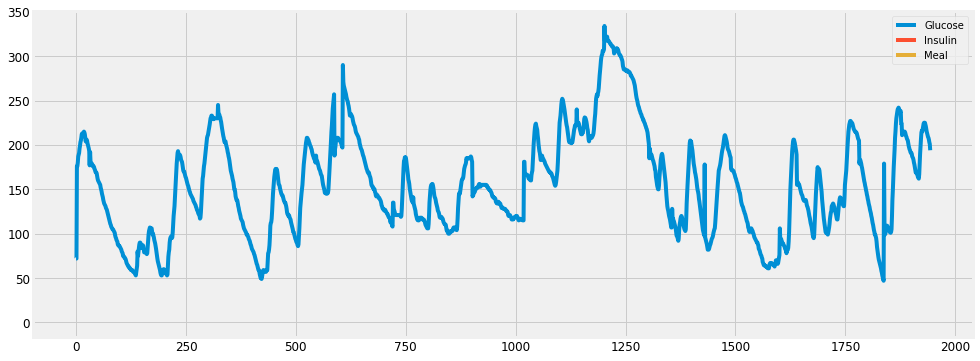

In [64]:
df.plot(figsize=(15,6))
plt.show()

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


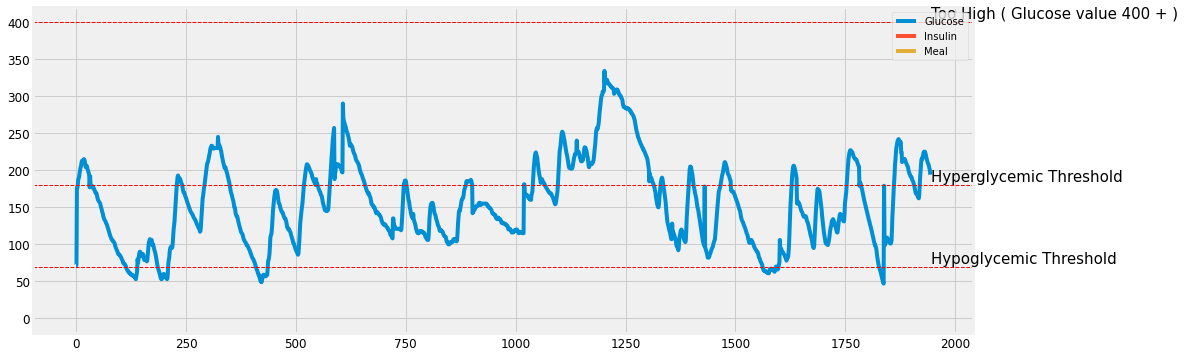

In [65]:
df.plot(figsize=(15,6))
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
#plt.annotate(df['Timestamp'][13],xy=(-50,40),xytext=(-50,0),fontsize=20,bbox=dict(boxstyle='square',
#                                                               color='white'),arrowprops=dict(facecolor='black'))
#plt.annotate(df['Timestamp'][len(df['Timestamp'])],xytext=(-,0),fontsize=20,bbox=dict(boxstyle='square',
 #                                                              color='white'))
plt.text(len(df['Timestamp']),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)

#y=70
#plt.plot(y,'b--',linestyles='--'),
#plt.hlines(70,linestyles='--')
plt.show()

In [66]:
#df.drop(0,inplace=True)

In [67]:
# drop한 인스턴스가 있어서 인덱스 리셋
#df=df.sort_values(by=['Timestamp'],axis=0,ascending=True)
#df=df.reset_index(drop=True)
#df.head(21)

In [68]:
# 인슐린, 탄수화물 투여시 혈당값 NULL
# 그래서 t시점에 t-2 , t-1 크기비교해서 upper면 이렇게 lower면 이렇게 해서 interpolation ( 보간)
# 이거 위에 참고사항 drop하고 나서 적용 해줘야됨
#insul=list()
#import math
#def interpolate_glucose(df,col):
#    #insul=list()
    
#    for i, row in df.iterrows():
#        val=row[col]
#        if math.isnan(val):
#            if df['Glucose'][i-2] >= df['Glucose'][i-1]:
#                c = (df['Glucose'][i-2] - df['Glucose'][i-1]) / 2 
#                df.loc[i,col]= df['Glucose'][i-1] - c
#                insul.append(i)
#                print(insul)
                
#            if df['Glucose'][i-2] < df['Glucose'][i-1]:
#                c = (df['Glucose'][i-2] - df['Glucose'][i-1]) / 2 
#                df.loc[i,col]= df['Glucose'][i-1] - c
#                insul.append(i)
#                print(insul)
        
           

In [69]:
# 인슐린 탄수화물 인덱스 문제 해결 파트 
#insul=list()
#meal=list()
#import math
#def interpolate_glucose(df,col):
    #insul=list()
    
#    for i, row in df.iterrows():
#        val=row[col]
        #df=df.sort_values(by=['Timestamp'],axis=0,ascending=True)
        #df=df.reset_index(drop=True)
#        if math.isnan(val):
 #           if df['Event'][i]=='인슐린':
  #              if df['Glucose'][i-1] is None:
   #                 insul.append(i-2)
                    
                    
    #            else:
     #               insul.append(i-1)
                    
      #      if df['Event'][i]=='탄수화물':
       #         if df['Glucose'][i-1] is None:
        #            meal.append(i-2)
                    
         #       else:
          #          meal.append(i-1)
                    

In [70]:
#interpolate_glucose(df,'Glucose')

In [71]:
#meal

In [72]:
#insul

In [73]:
df[225:235]

,Timestamp,Event,Glucose,Insulin,Meal
225,2019-07-31T13:02:43,EGV,140.0,NaN,NaN
226,2019-07-31T13:07:42,EGV,148.0,NaN,NaN
227,2019-07-31T13:12:42,EGV,160.0,NaN,NaN
228,2019-07-31T13:17:42,EGV,170.0,NaN,NaN
229,2019-07-31T13:22:42,EGV,179.0,NaN,NaN
230,2019-07-31T13:27:43,EGV,185.0,NaN,NaN
231,2019-07-31T13:32:42,EGV,191.0,NaN,NaN
232,2019-07-31T13:37:42,EGV,193.0,NaN,NaN
233,2019-07-31T13:42:42,EGV,190.0,NaN,NaN
234,2019-07-31T13:47:42,EGV,189.0,NaN,NaN


In [74]:
insul_glucose_value=list()
for i in new_insul_list:
    insul_glucose_value.append(df['Glucose'][i])

In [75]:
meal_glucose_value=list()
for i in new_meal_list:
    meal_glucose_value.append(df['Glucose'][i])

In [76]:
insul_and_meal_glucose_value = list()
for i in new_insul_and_meal_list:
    insul_and_meal_glucose_value.append(df['Glucose'][i])

In [77]:
#len = len(df['Timestamp'])
#plt.text(-100,-1,df['Timestamp'][0],family='Times New Roman',fontweight='bold',size=17)

In [78]:
for i in range(len(df)):
    if isNaN(df['Insulin'][i]):
        df['Insulin'][i]=1
    else:
        df['Insulin'][i]=0
        
     

In [79]:
for i in range(len(df)):
    if isNaN(df['Meal'][i]):
        df['Meal'][i]=1
    else:
        df['Meal'][i]=0
        

In [80]:
df[500:510]

,Timestamp,Event,Glucose,Insulin,Meal
500,2019-08-01T11:52:39,EGV,93.0,0.0,0.0
501,2019-08-01T11:57:39,EGV,91.0,0.0,0.0
502,2019-08-01T12:02:39,EGV,90.0,1.0,0.0
503,2019-08-01T12:07:39,EGV,89.0,0.0,0.0
504,2019-08-01T12:12:39,EGV,87.0,0.0,0.0
505,2019-08-01T12:17:39,EGV,86.0,0.0,0.0
506,2019-08-01T12:22:39,EGV,88.0,0.0,0.0
507,2019-08-01T12:27:39,EGV,96.0,0.0,0.0
508,2019-08-01T12:32:39,EGV,106.0,0.0,1.0
509,2019-08-01T12:37:39,EGV,119.0,0.0,0.0


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


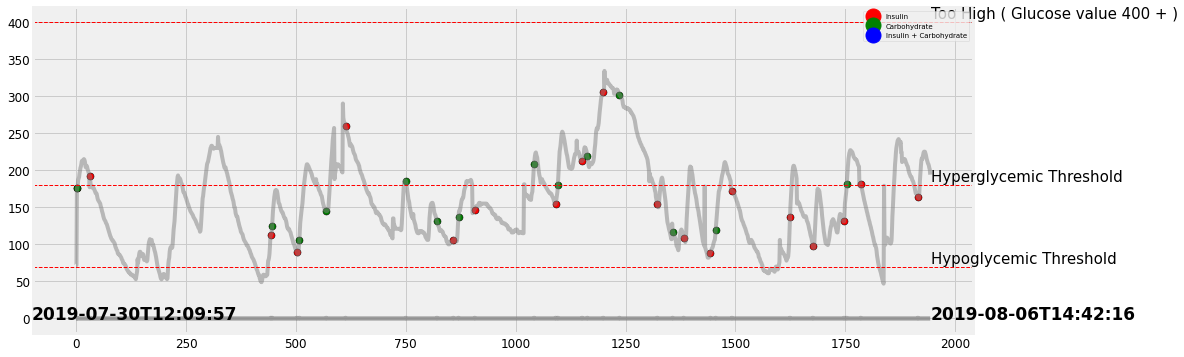

In [81]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

df.plot(figsize=(15,6),color='gray',alpha=0.5)
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
#plt.axhline(y=60,c='black',linestyle='--',linewidth=1)
plt.text(len(df['Timestamp']),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)

plt.scatter(new_insul_list,insul_glucose_value,edgecolor='black',s=50,label='Insulin',marker='o',c='red')
plt.scatter(new_meal_list,meal_glucose_value,edgecolor='black',s=50,label='Carbohydrate',marker='o',c='green')
plt.scatter(new_insul_and_meal_list,insul_and_meal_glucose_value,edgecolor='black',s=50,label='Insulin + Carbohydrate',marker='o',c='blue')

red_patch = mpatches.Patch(color='red',label='Insulin')

red_line = mlines.Line2D([],[],color='red',marker='o',markersize=15,label='Insulin')
green_line = mlines.Line2D([],[],color='green',marker='o',markersize=15,label='Carbohydrate')
blue_line = mlines.Line2D([],[],color='blue',marker='o',markersize=15,label='Insulin + Carbohydrate')
plt.text(len(df['Timestamp']),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.text(len(df['Timestamp']),60,'',family='Times New Roman',size=15)
#plt.text(len(df['Timestamp']),-1,df['Timestamp'][len(df['Timestamp'])],family='Times New Roman',
#         fontweight='bold',size=20)
plt.text(-100,-1,df['Timestamp'][0],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp']),-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.legend(['Insulin','Carbohydrate','Insulin + Carbohydrate'],loc='best',fontsize='x-small',handles=[red_line,green_line,blue_line])
#plt.text(-100,-1,df['Timestamp'][14],family='Times New Roman',

#         fontweight='bold',size=20)

#y=70
#plt.plot(y,'b--',linestyles='--'),
#plt.hlines(70,linestyles='--')
plt.show()

In [82]:
print("Attached day : %.1f" %(len(df)/288) )

Attached day : 6.8


In [83]:
df['Meal'].value_counts()

0.0    1930
1.0      14
Name: Meal, dtype: int64

In [84]:
print(df['Insulin'].value_counts())

0.0    1925
1.0      19
Name: Insulin, dtype: int64


## 이제 여기부터 DL 모델 돌려볼 것 
+ 일단 모델부터 간단하게 돌려보고 성능 측정
+ 그리고 전처리 해가면서 성능 비교

In [85]:
import numpy as np
import tensorflow as tf
import random as rn

In [86]:
# 재현 가능한 결과를 만들기 위해 시드값 설정 
import os 
import random
seed_num = 42
os.environ['PYTHONHASHSEED']=str(seed_num)

random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

In [87]:
from tensorflow.compat.v1.keras import backend as K

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [88]:
#from keras import backend as K
#session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
#sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
#tf.compat.v1.keras.backend.set_session(sess)


In [89]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))

In [90]:
from numpy import array
from numpy import hstack
in_seq1=df['Glucose'].to_numpy()
in_seq2 =df['Meal'].to_numpy()
in_seq3 =df['Insulin'].to_numpy()
out_seq = array([in_seq1[i]+in_seq2[i]+in_seq3[i] for i in range(len(in_seq1))])

In [91]:
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

In [92]:
dataset = hstack((in_seq1,in_seq2,in_seq3))

In [93]:
dataset = np.asarray(dataset).astype(np.float32)

## 15분

In [94]:
def multi_data(dataset,target,start_index,end_index, history_size, target_size, step, single_step=False):
    data=[]
    labels=[]
    
    start_index= start_index+history_size
    if end_index is None:
    #if end_index > len(dataset)-1:
        end_index = len(dataset)-target_size
        
    for i in range(start_index,end_index):
        indices = range(i-history_size,i, step)
        
        data.append(dataset[indices])
        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
        #data.append(np.reshape(dataset[indices],(history_size)))
        #labels.append(dataset[i+target_size])
    return np.array(data),np.array(labels)

In [95]:
raw_seq = in_seq1
#raw_seq=raw_seq.to_numpy(dtype='int64')

In [96]:
TRAIN_SPLIT=int(len(raw_seq)*0.7)
multi_past_history = 6
multi_future_target = 2
STEP=1
x_train_single, y_train_single = multi_data(dataset,dataset[:,0],0,TRAIN_SPLIT,
                                            multi_past_history,multi_future_target,STEP,single_step=True)
x_val_single, y_val_single = multi_data(dataset, dataset[:,0],TRAIN_SPLIT,
                                        None,multi_past_history,multi_future_target,STEP,single_step=True)

In [97]:
x_train_single[:3]

array([[[ 72.,   0.,   0.],
        [ 72.,   0.,   0.],
        [176.,   0.,   1.],
        [176.,   1.,   0.],
        [180.,   0.,   0.],
        [187.,   0.,   0.]],

       [[ 72.,   0.,   0.],
        [176.,   0.,   1.],
        [176.,   1.,   0.],
        [180.,   0.,   0.],
        [187.,   0.,   0.],
        [189.,   0.,   0.]],

       [[176.,   0.,   1.],
        [176.,   1.,   0.],
        [180.,   0.,   0.],
        [187.,   0.,   0.],
        [189.,   0.,   0.],
        [191.,   0.,   0.]]], dtype=float32)

In [98]:
df.head(20)

,Timestamp,Event,Glucose,Insulin,Meal
0,2019-07-30T12:09:57,교정,72.0,0.0,0.0
1,2019-07-30T12:10:11,교정,72.0,0.0,0.0
2,2019-07-30T18:05:37,교정,176.0,1.0,0.0
3,2019-07-30T18:45:02,교정,176.0,0.0,1.0
4,2019-07-30T18:47:51,EGV,180.0,0.0,0.0
5,2019-07-30T18:52:45,EGV,187.0,0.0,0.0
6,2019-07-30T18:57:45,EGV,189.0,0.0,0.0
7,2019-07-30T19:02:45,EGV,191.0,0.0,0.0
8,2019-07-30T19:07:44,EGV,196.0,0.0,0.0
9,2019-07-30T19:12:45,EGV,199.0,0.0,0.0


### RNN - 15분

In [99]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [100]:
from keras.layers import SimpleRNN

In [101]:
n_steps = 3
#delay=3
n_features=1

In [102]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)


In [103]:
x_train_single.shape[-2:]

(6, 3)

In [104]:
K.set_session(sess)

In [105]:
model = Sequential()
#model.add(SimpleRNN(50,activation='relu',input_shape=x_train_single.shape[-2:],return_sequences=False))
model.add(SimpleRNN(50,activation='relu',input_shape=x_train_single.shape[-2:],return_sequences=False))
model.add(Dense(1))

In [106]:
model.compile(optimizer='adam',loss='mse')

In [107]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [108]:
K.clear_session()

In [109]:
predict_result = model.predict(x_val_single,verbose=0)
val_rnn_15_predict_result = model.predict(x_val_single,verbose=0)

In [110]:
# 예측값 상한선 = 400 
for i in range(len(val_rnn_15_predict_result)):
    if val_rnn_15_predict_result[i] >= 400: 
        val_rnn_15_predict_result[i]=400
    elif val_rnn_15_predict_result[i] <= 60: 
        val_rnn_15_predict_result[i]=60

In [111]:
get_x_train_origin_15 = np.array(y_train_single)

In [112]:
get_x_train_origin_15 = get_x_train_origin_15.reshape(1,len(y_train_single))

In [113]:
get_x_train_origin_15.shape

(1, 1354)

In [114]:
get_y_val_origin_15 = np.array(y_val_single)

In [115]:
get_y_val_origin_15 = get_y_val_origin_15.reshape(1,len(y_val_single))

In [116]:
get_y_val_origin_15.shape

(1, 576)

In [117]:
#get_y_val_origin

In [118]:
get_val_rnn_15_predict_result = np.array(val_rnn_15_predict_result)

In [119]:
get_val_rnn_15_predict_result = get_val_rnn_15_predict_result.T

In [120]:
get_val_rnn_15_predict_result.shape

(1, 576)

In [121]:
# Val set RMSE 
print(' Vanila RNN (Simple RNN) - RMSE (15min) : ',RMSE(y_val_single,val_rnn_15_predict_result))
val_rnn_15 = RMSE(y_val_single,val_rnn_15_predict_result)


 Vanila RNN (Simple RNN) - RMSE (15min) :  11.709269


#### Validation

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


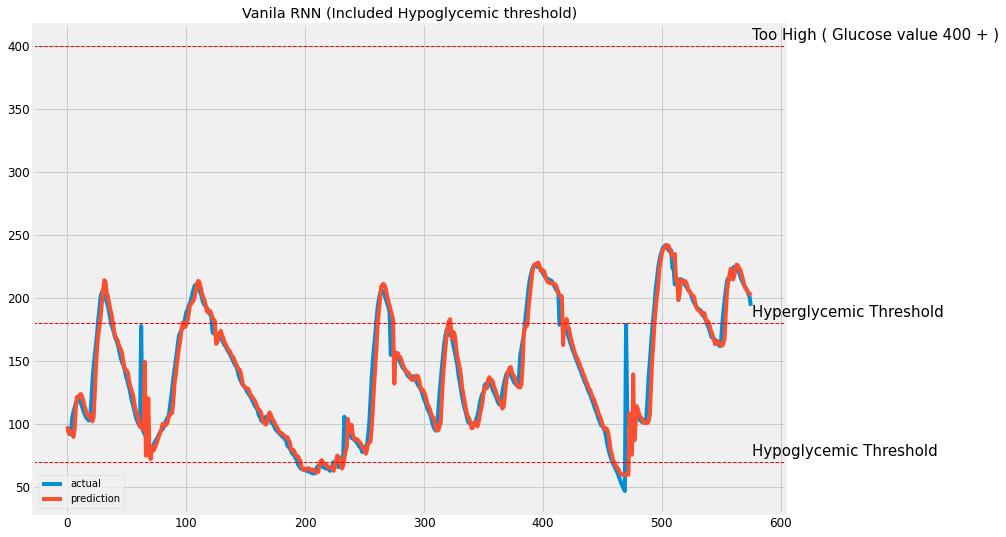

In [122]:
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_rnn_15_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_rnn_15_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_rnn_15_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_rnn_15_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)

plt.title('Vanila RNN (Included Hypoglycemic threshold)',family='Times New Roman')
plt.legend()
plt.show()

In [123]:
y_val_single

array([ 96.,  94.,  92.,  95., 105., 110., 113., 117., 119., 120., 119.,
       117., 115., 112., 109., 107., 105., 104., 103., 105., 117., 134.,
       146., 155., 164., 173., 184., 193., 202., 205., 203., 204., 200.,
       197., 194., 189., 184., 179., 176., 173., 169., 167., 164., 161.,
       156., 152., 149., 147., 144., 139., 136., 132., 129., 124., 119.,
       116., 112., 108., 104., 102., 100.,  98., 178.,  96.,  94.,  92.,
        90.,  88.,  85.,  82.,  82.,  82.,  83.,  85.,  87.,  88.,  90.,
        92.,  94.,  95.,  96.,  98., 101., 103., 105., 106., 112., 120.,
       127., 136., 143., 150., 157., 165., 171., 173., 175., 177., 180.,
       184., 189., 191., 194., 196., 199., 203., 207., 210., 211., 210.,
       208., 206., 204., 201., 197., 195., 194., 193., 191., 189., 187.,
       186., 173., 172., 172., 171., 171., 171., 170., 168., 167., 165.,
       163., 162., 160., 158., 157., 155., 153., 151., 149., 147., 146.,
       143., 139., 136., 134., 132., 131., 130., 12

#### Train

In [124]:
train_rnn_15_predict_result = model.predict(x_train_single,verbose=0)

In [125]:
# 예측값 상한선 = 400 
for i in range(len(train_rnn_15_predict_result)):
    if train_rnn_15_predict_result[i] >= 400: 
        train_rnn_15_predict_result[i]=400
    elif train_rnn_15_predict_result[i] <= 60: 
        train_rnn_15_predict_result[i]=60

In [126]:
get_train_rnn_15_predict_result = np.array(train_rnn_15_predict_result)

In [127]:
get_train_rnn_15_predict_result = get_train_rnn_15_predict_result.T

In [128]:
get_train_rnn_15_predict_result.shape

(1, 1354)

### LSTM - 15분

In [129]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [130]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))


In [131]:
model.compile(optimizer='adam',loss='mse')

In [132]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [133]:
K.clear_session()

In [134]:

val_lstm_15_predict_result = model.predict(x_val_single,verbose=0)

In [135]:
# 예측값 상한선 = 400 
for i in range(len(val_lstm_15_predict_result)):
    if val_lstm_15_predict_result[i] >= 400: 
        val_lstm_15_predict_result[i]=400
    elif val_lstm_15_predict_result[i] <= 60: 
        val_lstm_15_predict_result[i]=60

In [136]:
#predict_result

In [137]:
get_val_lstm_15_predict_result = np.array(val_lstm_15_predict_result)

In [138]:
get_val_lstm_15_predict_result = get_val_lstm_15_predict_result.T

In [139]:
get_val_lstm_15_predict_result.shape

(1, 576)

In [140]:
print(' LSTM - RMSE (15min) : ',RMSE(y_val_single,val_lstm_15_predict_result))
val_lstm_15=RMSE(y_val_single,val_lstm_15_predict_result)

 LSTM - RMSE (15min) :  11.437446


In [141]:
TRAIN_SPLIT

1360

In [142]:

train_lstm_15_predict_result = model.predict(x_train_single,verbose=0)

In [143]:
# 예측값 상한선 = 400 
for i in range(len(train_lstm_15_predict_result)):
    if train_lstm_15_predict_result[i] >= 400: 
        train_lstm_15_predict_result[i]=400
    elif train_lstm_15_predict_result[i] <= 60: 
        train_lstm_15_predict_result[i]=60

In [144]:
#predict_result

In [145]:
get_train_lstm_15_predict_result = np.array(train_lstm_15_predict_result)

In [146]:
get_train_lstm_15_predict_result = get_train_lstm_15_predict_result.T

In [147]:
get_train_lstm_15_predict_result.shape

(1, 1354)

#### Validation

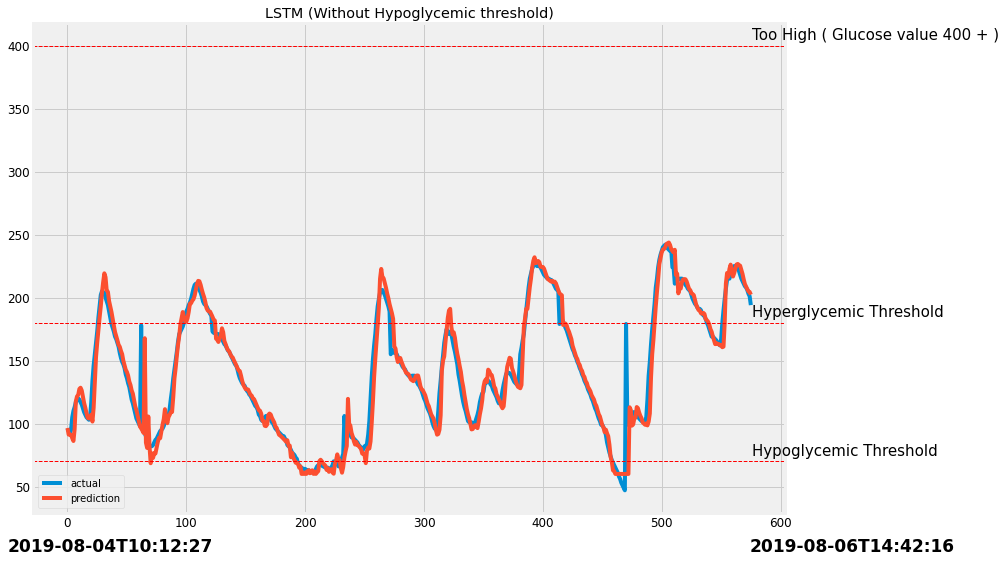

In [148]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_lstm_15_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_lstm_15_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_lstm_15_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_lstm_15_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('LSTM (Without Hypoglycemic threshold)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### Stacked LSTM - 15분

In [149]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [150]:
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=x_train_single.shape[-2:]))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [151]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [152]:
K.clear_session()

In [153]:
val_slstm_15_predict_result = model.predict(x_val_single,verbose=0)


In [154]:
for i in range(len(val_slstm_15_predict_result)):
    if val_slstm_15_predict_result[i] >= 400: 
        val_slstm_15_predict_result[i]=400
    elif val_slstm_15_predict_result[i] <= 60: 
        val_slstm_15_predict_result[i]=60

In [155]:
get_val_slstm_15_predict_result = np.array(val_slstm_15_predict_result)

In [156]:
get_val_slstm_15_predict_result = get_val_slstm_15_predict_result.T

In [157]:
get_val_slstm_15_predict_result.shape

(1, 576)

In [158]:
print(' Stacked LSTM - RMSE(15min) : ',RMSE(y_val_single,val_slstm_15_predict_result))
val_stacklstm_15 =RMSE(y_val_single,val_slstm_15_predict_result)

 Stacked LSTM - RMSE(15min) :  11.391652


In [159]:
train_slstm_15_predict_result = model.predict(x_train_single,verbose=0)


In [160]:
for i in range(len(train_slstm_15_predict_result)):
    if train_slstm_15_predict_result[i] >= 400: 
        train_slstm_15_predict_result[i]=400
    elif train_slstm_15_predict_result[i] <= 60: 
        train_slstm_15_predict_result[i]=60

In [161]:
get_train_slstm_15_predict_result = np.array(train_slstm_15_predict_result)

In [162]:
get_train_slstm_15_predict_result = get_train_slstm_15_predict_result.T

In [163]:
get_train_slstm_15_predict_result.shape

(1, 1354)

#### Validation

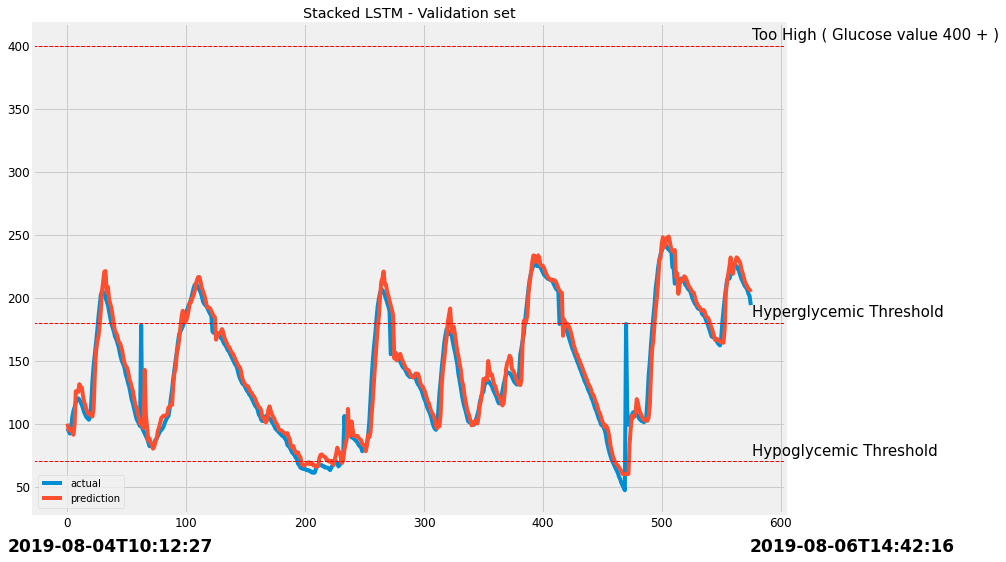

In [164]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_slstm_15_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_slstm_15_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_slstm_15_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_slstm_15_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Stacked LSTM - Validation set',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### Bidirectional LSTM - 15분

In [165]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [166]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50,activation='relu'),input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [167]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [168]:
K.clear_session()

In [169]:
val_bilstm_15_predict_result = model.predict(x_val_single,verbose=0)

In [170]:
for i in range(len(val_bilstm_15_predict_result)):
    if val_bilstm_15_predict_result[i] >= 400: 
        val_bilstm_15_predict_result[i]=400
    elif val_bilstm_15_predict_result[i] <= 60: 
        val_bilstm_15_predict_result[i]=60

In [171]:
get_val_bilstm_15_predict_result = np.array(val_bilstm_15_predict_result)

In [172]:
get_val_bilstm_15_predict_result = get_val_bilstm_15_predict_result.T

In [173]:
get_val_bilstm_15_predict_result.shape

(1, 576)

In [174]:
print('Bidirectional LSTM - RMSE : ',RMSE(y_val_single,val_bilstm_15_predict_result))
val_bilstm_15 = RMSE(y_val_single,val_bilstm_15_predict_result)

Bidirectional LSTM - RMSE :  13.649834


In [175]:
train_bilstm_15_predict_result = model.predict(x_train_single,verbose=0)

In [176]:
for i in range(len(train_bilstm_15_predict_result)):
    if train_bilstm_15_predict_result[i] >= 400: 
        train_bilstm_15_predict_result[i]=400
    elif train_bilstm_15_predict_result[i] <= 60: 
        train_bilstm_15_predict_result[i]=60

In [177]:
get_train_bilstm_15_predict_result = np.array(train_bilstm_15_predict_result)

In [178]:
get_train_bilstm_15_predict_result = get_train_bilstm_15_predict_result.T

In [179]:
get_train_bilstm_15_predict_result.shape

(1, 1354)

#### Validation

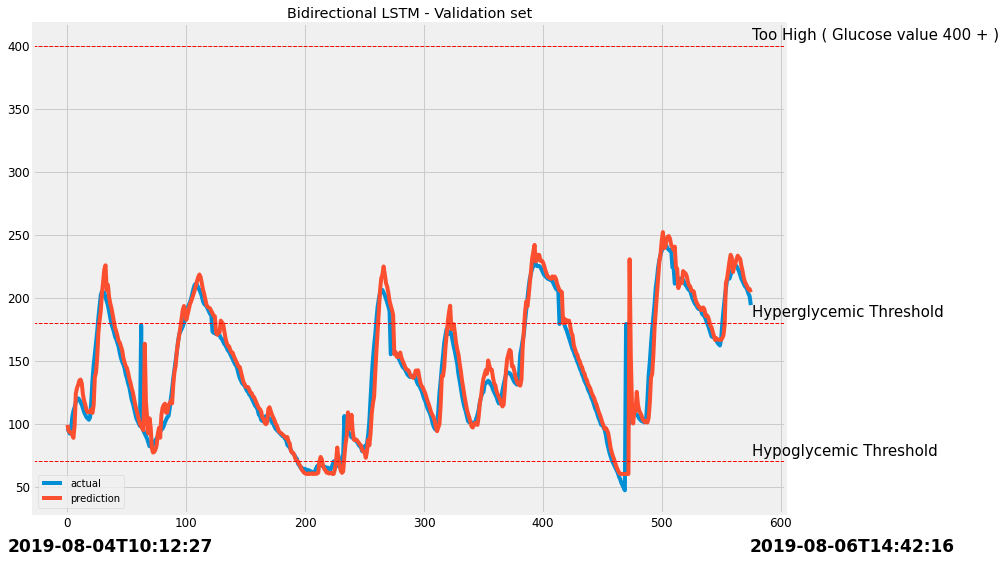

In [180]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_bilstm_15_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_bilstm_15_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_bilstm_15_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_bilstm_15_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Bidirectional LSTM - Validation set',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### GRU - 15분

In [181]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [182]:
from keras.layers import GRU
model = Sequential()
model.add(GRU(50,activation='relu',input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [183]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                8250      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
_________________________________________________________________


In [184]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [185]:
K.clear_session()

In [186]:
val_gru_15_predict_result = model.predict(x_val_single,verbose=0)

In [187]:
for i in range(len(val_gru_15_predict_result)):
    if val_gru_15_predict_result[i] >= 400: 
        val_gru_15_predict_result[i]=400
    elif val_gru_15_predict_result[i] <= 60: 
        val_gru_15_predict_result[i]=60

In [188]:
get_val_gru_15_predict_result = np.array(val_gru_15_predict_result)

In [189]:
get_val_gru_15_predict_result = get_val_gru_15_predict_result.T

In [190]:
get_val_gru_15_predict_result.shape

(1, 576)

In [191]:
#predict_result

In [192]:
#predict_result

In [193]:

print('GRU - RMSE 15min : ',RMSE(y_val_single,val_gru_15_predict_result))
val_gru_15 = RMSE(y_val_single,val_gru_15_predict_result)
# 상한선 400일 때 RMSE - 38.30 
# 상한선 400 X - 38.63

GRU - RMSE 15min :  11.103334


In [194]:
train_gru_15_predict_result = model.predict(x_train_single,verbose=0)

In [195]:
for i in range(len(train_gru_15_predict_result)):
    if train_gru_15_predict_result[i] >= 400: 
        train_gru_15_predict_result[i]=400
    elif train_gru_15_predict_result[i] <= 60: 
        train_gru_15_predict_result[i]=60

In [196]:
get_train_gru_15_predict_result = np.array(train_gru_15_predict_result)

In [197]:
get_train_gru_15_predict_result = get_train_gru_15_predict_result.T

In [198]:
get_train_gru_15_predict_result.shape

(1, 1354)

#### Validation

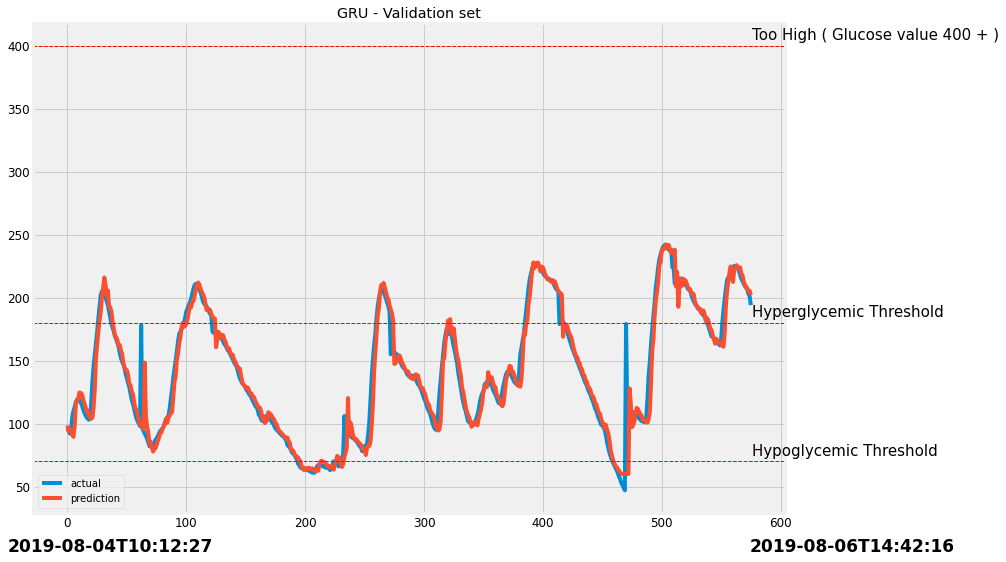

In [199]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_gru_15_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_gru_15_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_gru_15_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_gru_15_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('GRU - Validation set',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### GA_15

In [200]:
pip install geneticalgorithm2

     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp37-none-any.whl size=15079 sha256=975023cf09dc6d00aa8146abaa81906b3113f53d43cda1ea3a19a4780ae5efc5
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


In [201]:
from geneticalgorithm2 import geneticalgorithm2 as ga # for running model

In [202]:
train_rnn_15_predict_result = np.asarray(train_rnn_15_predict_result)
train_lstm_15_predict_result = np.asarray(train_lstm_15_predict_result)
train_slstm_15_predict_result = np.asarray(train_slstm_15_predict_result)
train_bilstm_15_predict_result = np.asarray(train_bilstm_15_predict_result)
train_gru_15_predict_result = np.asarray(train_gru_15_predict_result)

In [203]:
val_rnn_15_predict_result = np.asarray(val_rnn_15_predict_result)
val_lstm_15_predict_result = np.asarray(val_lstm_15_predict_result)
val_slstm_15_predict_result = np.asarray(val_slstm_15_predict_result)
val_bilstm_15_predict_result = np.asarray(val_bilstm_15_predict_result)
val_gru_15_predict_result = np.asarray(val_gru_15_predict_result)

In [204]:
def evaluate2(X):
  pen = 0 
  #coef = [0,0,0,0,0]
  ab=0
  result =0
  #result2 = 0
  #print(X)
  if sum(X) > 0.99 and sum(X) < 1:
    #print("\n ** Count ** ")
    #print(count)
    #sum(coef)
    #pen = 2000 - sum(list1 * coef[0] + list2 * coef[1] + # 400 = 혈당측정기에서 수집한 EGV의 최댓값이 400
    #             list3 * coef[2] + list4 * coef[3] +
    #             list5 * coef[4])
    #RMSE(y_val_uni_origin,predict_result)
    #result = mean_squared_error((y_val_uni_origin,(val_rnn_30_predict_result * X[0] + val_lstm_30_predict_result * X[1] +
    #             val_slstm_30_predict_result * X[2] + val_bilstm_30_predict_result * X[3] +
    #             val_gru_30_predict_result * X[4]))**0.5)
   # ab = val_rnn_30_predict_result * X[0] + val_lstm_30_predict_result * X[1] +val_slstm_30_predict_result * X[2] + val_bilstm_30_predict_result * X[3] + val_gru_30_predict_result * X[4]
   # print("\n ** A ** \n")
   # print(ab.shape)
    result = 30 - np.sqrt(mean_squared_error(train_rnn_15_predict_result * X[0] + train_lstm_15_predict_result * X[1] +train_slstm_15_predict_result * X[2] + 
                                train_bilstm_15_predict_result * X[3] + train_gru_15_predict_result * X[4],y_train_single))
    
    #result = 10 - mean_squared_error(y_val_uni_origin,abc) / test_result 
    #result2=(test_result*5) - np.sqrt(result)
    #test_result =  mean_squared_error(y_val_uni_origin,ex)
    #test_result

    #pen = RMSE(y_val_uni_origin,result)
    #pen = 200 - np.sqrt(y_val_uni_origin,(val_rnn_15_predict_result * (X[0] / 10000) + val_lstm_15_predict_result * (X[1] / 10000) +
    #             val_slstm_15_predict_result * (X[2] / 10000) + val_bilstm_15_predict_result * (X[3] / 10000) +
    #             val_gru_15_predict_result * (X[4] / 10000)))
    # np.sqrt(mean_squared_error(y_test,y_predict))
    print("\n ** B ** \n")
    print(X)
    #print()
    print("\n ** C ** \n")
    print(result)
  #return np.sum(X) + pen
    #count += 1 
  return -result
    
    

In [205]:
varbound2 = np.array([[0.05, 0.5]]*5)

In [206]:
algorithm_param = {'max_num_iteration': 10000,
                   'population_size':100,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'selection_type': 'roulette',
                   'max_iteration_without_improv':None}

In [207]:
model1 = ga(function = evaluate2, dimension = 5, variable_type='real',variable_boundaries=varbound2,algorithm_parameters = algorithm_param)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 ** B ** 

[0.0500508  0.24297543 0.35925893 0.2803523  0.05737797]

 ** C ** 

21.581782341003418

 ** B ** 

[0.0500508  0.24297543 0.35925893 0.2803523  0.05737797]

 ** C ** 

21.581782341003418

 ** B ** 

[0.0500508  0.24356736 0.35925893 0.28642388 0.05737797]

 ** C ** 

21.48962688446045

 ** B ** 

[0.0500508  0.24356736 0.35925893 0.2803523  0.05737797]

 ** C ** 

21.580076217651367

 ** B ** 

[0.0500508  0.24356736 0.35925893 0.2803523  0.05737797]

 ** C ** 

21.580076217651367

 ** B ** 

[0.0500508  0.24356736 0.35925893 0.2803523  0.05737797]

 ** C ** 

21.580076217651367
|||||||||||||||||||||||||||||||||||||||||||||||||| 99.9% GA is running...9986 gen from 10000
 ** B ** 

[0.0500508  0.24356736 0.35925893 0.2803523  0.05737797]

 ** C ** 

21.580076217651367

 ** B ** 

[0.0500508  0.24297543 0.35925893 0.2803523  0.05737797]

 ** C ** 

21.581782341003418

 ** B ** 

[0.0500508  0.24297543 0.35925893 0.2803523  0.05737797]

 ** 

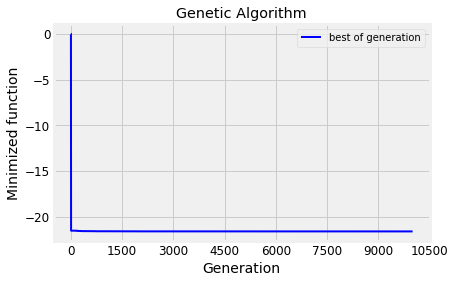

In [208]:
model1.run()

In [209]:
# RMSE 
optimized = val_rnn_15_predict_result * model1.output_dict['variable'][0] + val_lstm_15_predict_result *model1.output_dict['variable'][1] + val_slstm_15_predict_result * model1.output_dict['variable'][2] + val_bilstm_15_predict_result * model1.output_dict['variable'][3] + val_gru_15_predict_result * model1.output_dict['variable'][4]
for i in range(len(optimized)):
    if optimized[i] >= 400: 
        optimized[i]=400
    if optimized[i] <= 60: 
        optimized[i]=60
optimized_rmse_15 =  RMSE(y_val_single,optimized)
optimized_rmse_15

11.241219

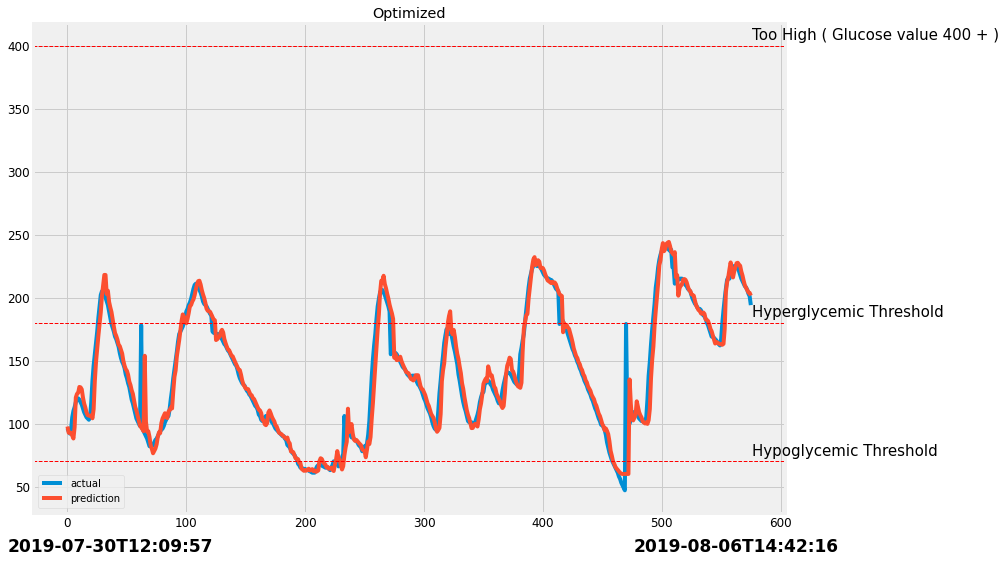

In [210]:
# 트레이닝셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(optimized,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(y_val_single),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(y_val_single),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(y_val_single),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Optimized',family='Times New Roman')
#plt.text(-100,-1,df['Timestamp'][0],family='Times New Roman',fontweight='bold',size=17)
#plt.text(len(predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)

plt.text(-50,-1,df['Timestamp'][0],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(y_val_single)-100,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)

plt.legend(loc='best')
plt.show()

In [211]:
#from pandas import DataFrame
#residuals = [y_val_uni[i]-predict_result[i] for i in range(len(predict_result))]
#residuals=DataFrame(residuals)
#residuals.hist()

In [212]:
#residuals.plot(kind='kde')

In [213]:
#residuals.plot()

In [214]:
#from statsmodels.graphics.gofplots import qqplot
#residuals=np.array(residuals)
#qqplot(residuals)

In [215]:
get_optimized = np.array(optimized)

In [216]:
get_optimized = get_optimized.T

In [217]:
get_optimized.shape

(1, 576)

In [218]:
ar_val_15=np.concatenate((get_y_val_origin_15, get_val_rnn_15_predict_result,get_val_lstm_15_predict_result,get_val_slstm_15_predict_result,get_val_bilstm_15_predict_result,get_val_gru_15_predict_result,get_optimized), axis = 0)


In [219]:
ar_train_15 = np.concatenate((get_x_train_origin_15, get_train_rnn_15_predict_result ,get_train_lstm_15_predict_result ,get_train_slstm_15_predict_result,get_train_bilstm_15_predict_result,get_train_gru_15_predict_result),axis=0)

In [220]:
#ar_val_15=np.concatenate((get_y_val_origin, get_val_rnn_15_predict_result,get_val_lstm_15_predict_result,get_val_slstm_15_predict_result,get_val_bilstm_15_predict_result,get_val_gru_15_predict_result), axis = 0)


In [221]:
#ar_train_15 = np.concatenate((get_x_train_origin_15, get_train_rnn_15_predict_result ,get_train_lstm_15_predict_result ,get_train_slstm_15_predict_result,get_train_bilstm_15_predict_result,get_train_gru_15_predict_result),axis=0)

In [222]:
y1=pd.DataFrame(ar_val_15,index=['15_val_origin','15_val_rnn','15_val_lstm','15_val_slstm','15_val_bilstm','15_val_gru','15_optimized'])
y1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575
15_val_origin,96.000000,94.000000,92.000000,95.000000,105.000000,110.000000,113.000000,117.000000,119.000000,120.000000,119.000000,117.000000,115.000000,112.000000,109.000000,107.000000,105.000000,104.000000,103.000000,105.000000,117.000000,134.000000,146.000000,155.000000,164.000000,173.000000,184.000000,193.000000,202.000000,205.000000,203.000000,204.000000,200.000000,197.000000,194.000000,189.000000,184.000000,179.000000,176.000000,173.000000,169.000000,167.000000,164.000000,161.000000,156.000000,152.000000,149.000000,147.000000,144.000000,139.000000,136.000000,132.000000,129.000000,124.000000,119.000000,116.000000,112.000000,108.000000,104.000000,102.000000,100.000000,98.000000,178.000000,96.000000,94.000000,92.000000,90.000000,88.000000,85.000000,82.000000,82.000000,82.000000,83.000000,85.000000,87.000000,88.000000,90.000000,92.000000,94.000000,95.000000,96.000000,98.000000,101.000000,103.000000,105.000000,106.000000,112.000000,120.000000,127.000000,136.000000,143.000000,150.000000,157.000000,165.000000,171.000000,173.000000,175.000000,177.000000,180.000000,184.000000,189.000000,191.000000,194.000000,196.000000,199.000000,203.000000,207.000000,210.000000,211.000000,210.000000,208.000000,206.000000,204.000000,201.000000,197.000000,195.000000,194.000000,193.000000,191.000000,189.000000,187.000000,186.000000,173.000000,172.000000,172.000000,171.000000,171.000000,171.000000,170.000000,168.000000,167.000000,165.000000,163.000000,162.000000,160.000000,158.000000,157.000000,155.000000,153.000000,151.000000,149.000000,147.000000,146.000000,143.000000,139.000000,136.000000,134.000000,132.000000,131.000000,130.000000,128.000000,126.000000,125.000000,123.000000,122.000000,120.000000,118.000000,116.000000,114.000000,113.000000,111.000000,107.000000,106.000000,103.000000,102.000000,102.000000,105.000000,106.000000,106.000000,105.000000,104.000000,103.000000,101.000000,100.000000,98.000000,96.000000,95.000000,94.000000,93.000000,92.000000,91.000000,90.000000,90.000000,88.000000,87.000000,83.000000,82.000000,81.000000,79.000000,77.000000,76.000000,75.000000,73.000000,72.000000,6

In [223]:
y2=pd.DataFrame(ar_train_15,index=['15_train_origin','15_train_rnn','15_train_lstm','15_train_slstm','15_train_bilstm','15_train_gru'])
y2
#y.append(get_val_rnn_15_predict_result,ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353
15_train_origin,196.000000,199.000000,203.000000,205.000000,208.000000,212.000000,213.000000,210.000000,212.000000,213.000000,215.000000,214.000000,212.000000,208.000000,204.000000,206.000000,206.000000,205.000000,202.000000,200.000000,198.000000,196.000000,193.000000,177.000000,192.000000,181.000000,178.000000,179.000000,179.000000,178.000000,176.000000,176.000000,176.000000,175.000000,173.000000,172.000000,170.000000,169.000000,169.000000,168.000000,165.000000,162.000000,160.000000,159.000000,158.000000,157.000000,156.000000,155.000000,152.000000,150.000000,148.000000,145.000000,143.000000,141.000000,138.000000,136.000000,134.000000,133.000000,132.000000,131.000000,129.000000,128.000000,127.000000,125.000000,123.000000,121.000000,119.000000,117.000000,115.000000,113.000000,111.000000,110.000000,108.000000,107.000000,106.000000,105.000000,105.000000,104.000000,103.000000,102.000000,101.000000,98.000000,96.000000,95.000000,93.000000,92.000000,91.000000,88.000000,87.000000,87.000000,86.000000,86.000000,85.000000,84.000000,83.000000,82.000000,80.000000,79.000000,78.000000,75.000000,75.000000,74.000000,73.000000,73.000000,72.000000,71.000000,69.000000,67.000000,66.000000,65.000000,64.000000,63.000000,63.000000,62.000000,61.000000,61.000000,60.000000,59.000000,59.000000,59.000000,59.000000,58.000000,57.000000,57.000000,57.00000,57.000000,55.000000,54.000000,53.000000,57.000000,62.000000,64.0,80.000000,75.000000,80.000000,84.000000,88.000000,90.000000,90.000000,89.000000,87.000000,84.000000,85.000000,86.000000,87.000000,86.000000,82.000000,79.000000,79.000000,79.000000,80.000000,79.000000,78.000000,77.000000,78.000000,85.000000,93.000000,99.000000,103.000000,105.000000,107.000000,106.000000,105.000000,106.000000,106.000000,102.000000,99.000000,100.000000,98.000000,96.000000,93.000000,91.000000,89.000000,86.000000,83.000000,79.00

## 30분

In [224]:
TRAIN_SPLIT=int(len(raw_seq)*0.7)
multi_past_history = 6
multi_future_target = 5
STEP=1
x_train_single, y_train_single = multi_data(dataset,dataset[:,0],0,TRAIN_SPLIT,
                                            multi_past_history,multi_future_target,STEP,single_step=True)
x_val_single, y_val_single = multi_data(dataset, dataset[:,0],TRAIN_SPLIT,
                                        None,multi_past_history,multi_future_target,STEP,single_step=True)

In [225]:
#x_train_uni.shape


In [226]:

#x_val_uni.shape

In [227]:
#x_train_uni[0]

In [228]:
#df['Glucose'].head(15)

In [229]:
#y_train_uni[0]

### RNN - 30분

In [230]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [231]:
model = Sequential()
model.add(SimpleRNN(50,activation='relu',input_shape=x_train_single.shape[-2:],return_sequences=False))
model.add(Dense(1))

In [232]:
model.compile(optimizer='adam',loss='mse')

In [233]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [234]:
K.clear_session()

In [235]:
val_rnn_30_predict_result = model.predict(x_val_single,verbose=0)

In [236]:
# 예측값 상한선 = 400 
for i in range(len(val_rnn_30_predict_result)):
    if val_rnn_30_predict_result[i] >= 400: 
        val_rnn_30_predict_result[i]=400
    elif val_rnn_30_predict_result[i] <= 60: 
        val_rnn_30_predict_result[i]=60

In [237]:
get_x_train_origin_30 = np.array(y_train_single)

In [238]:
get_x_train_origin_30 = get_x_train_origin_30.reshape(1,len(y_train_single))

In [239]:
get_x_train_origin_30.shape

(1, 1354)

In [240]:
get_y_val_origin_30 = np.array(y_val_single)

In [241]:
get_y_val_origin_30 = get_y_val_origin_30.reshape(1,len(y_val_single))

In [242]:
get_y_val_origin_30.shape

(1, 573)

In [243]:
#get_y_val_origin

In [244]:
get_val_rnn_30_predict_result = np.array(val_rnn_30_predict_result)

In [245]:
get_val_rnn_30_predict_result = get_val_rnn_30_predict_result.T

In [246]:
get_val_rnn_30_predict_result.shape

(1, 573)

In [247]:
# Val set RMSE 
print(' Vanila RNN (Simple RNN) - RMSE (15min) : ',RMSE(y_val_single,val_rnn_30_predict_result))
val_rnn_30 = RMSE(y_val_single,val_rnn_30_predict_result)


 Vanila RNN (Simple RNN) - RMSE (15min) :  19.602022


In [248]:
train_rnn_30_predict_result = model.predict(x_train_single,verbose=0)

In [249]:
# 예측값 상한선 = 400 
for i in range(len(train_rnn_30_predict_result)):
    if train_rnn_30_predict_result[i] >= 400: 
        train_rnn_30_predict_result[i]=400
    elif train_rnn_30_predict_result[i] <= 60: 
        train_rnn_30_predict_result[i]=60

In [250]:
get_train_rnn_30_predict_result = np.array(train_rnn_30_predict_result)

In [251]:
get_train_rnn_30_predict_result = get_train_rnn_30_predict_result.T

In [252]:
get_train_rnn_30_predict_result.shape

(1, 1354)

#### Validation

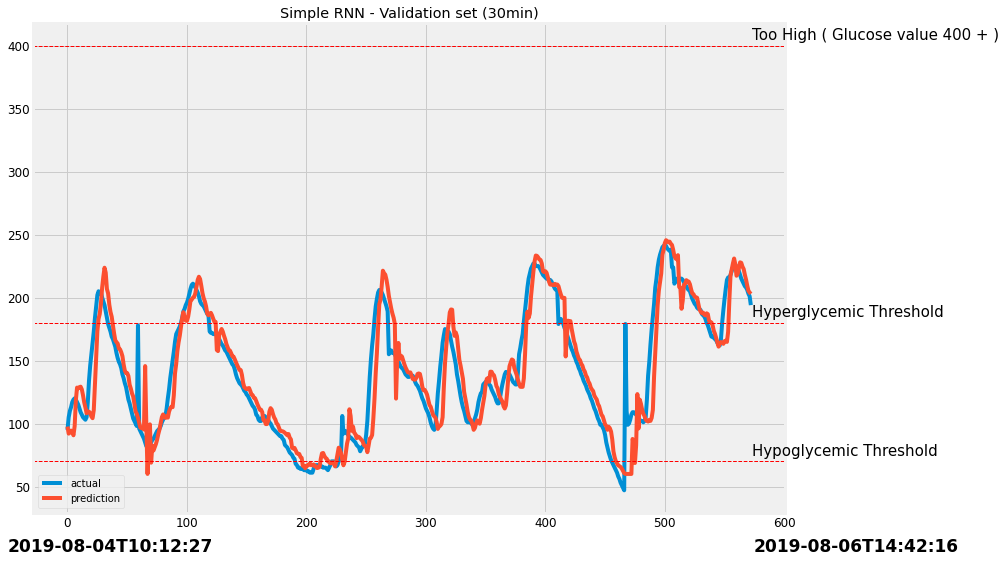

In [253]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_rnn_30_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_rnn_30_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_rnn_30_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_rnn_30_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Simple RNN - Validation set (30min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### LSTM - 30분

In [254]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [255]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))


In [256]:
model.compile(optimizer='adam',loss='mse')

model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

K.clear_session()

In [257]:
val_lstm_30_predict_result = model.predict(x_val_single,verbose=0)

# 예측값 상한선 = 400 
for i in range(len(val_lstm_30_predict_result)):
    if val_lstm_30_predict_result[i] >= 400: 
        val_lstm_30_predict_result[i]=400
    elif val_lstm_30_predict_result[i] <= 60: 
        val_lstm_30_predict_result[i]=60

#predict_result

print(' LSTM - RMSE (15min) : ',RMSE(y_val_single,val_lstm_30_predict_result))
val_lstm_30=RMSE(y_val_single,val_lstm_30_predict_result)

 LSTM - RMSE (15min) :  21.245714


In [258]:
get_val_lstm_30_predict_result = np.array(val_lstm_30_predict_result)

In [259]:
get_val_lstm_30_predict_result = get_val_lstm_30_predict_result.T

In [260]:
get_val_lstm_30_predict_result.shape

(1, 573)

In [261]:
train_lstm_30_predict_result = model.predict(x_train_single,verbose=0)

In [262]:
# 예측값 상한선 = 400 
for i in range(len(train_lstm_30_predict_result)):
    if train_lstm_30_predict_result[i] >= 400: 
        train_lstm_30_predict_result[i]=400
    elif train_lstm_30_predict_result[i] <= 60: 
        train_lstm_30_predict_result[i]=60

In [263]:
get_train_lstm_30_predict_result = np.array(train_lstm_30_predict_result)

In [264]:
get_train_lstm_30_predict_result = get_train_lstm_30_predict_result.T

In [265]:
get_train_lstm_30_predict_result.shape

(1, 1354)

#### Validation

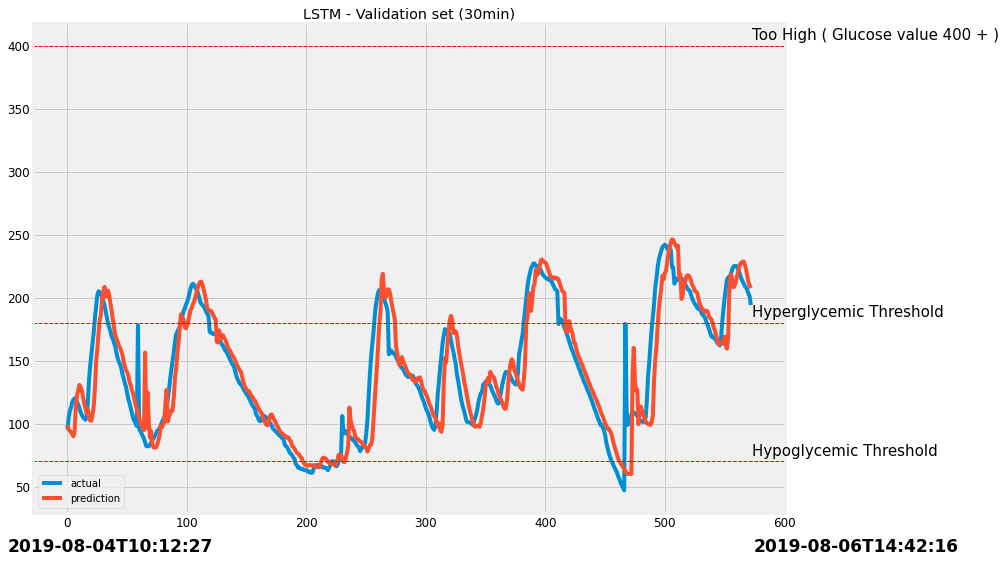

In [266]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_lstm_30_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_lstm_30_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_lstm_30_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_lstm_30_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('LSTM - Validation set (30min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### Stacked LSTM - 30분

In [267]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [268]:
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=x_train_single.shape[-2:]))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [269]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [270]:
K.clear_session()

In [271]:
val_slstm_30_predict_result = model.predict(x_val_single,verbose=0)


for i in range(len(val_slstm_30_predict_result)):
    if val_slstm_30_predict_result[i] >= 400: 
        val_slstm_30_predict_result[i]=400
    elif val_slstm_30_predict_result[i] <= 60: 
        val_slstm_30_predict_result[i]=60

print(' Stacked LSTM - RMSE(15min) : ',RMSE(y_val_single,val_slstm_30_predict_result))
val_stacklstm_30 =RMSE(y_val_single,val_slstm_30_predict_result)

 Stacked LSTM - RMSE(15min) :  18.859568


In [272]:
get_val_slstm_30_predict_result = np.array(val_slstm_30_predict_result)

In [273]:
get_val_slstm_30_predict_result = get_val_slstm_30_predict_result.T

In [274]:
get_val_slstm_30_predict_result.shape

(1, 573)

In [275]:
train_slstm_30_predict_result = model.predict(x_train_single,verbose=0)

In [276]:
# 예측값 상한선 = 400 
for i in range(len(train_slstm_30_predict_result)):
    if train_slstm_30_predict_result[i] >= 400: 
        train_slstm_30_predict_result[i]=400
    elif train_slstm_30_predict_result[i] <= 60: 
        train_slstm_30_predict_result[i]=60

In [277]:
get_train_slstm_30_predict_result = np.array(train_slstm_30_predict_result)

In [278]:
get_train_slstm_30_predict_result = get_train_slstm_30_predict_result.T

In [279]:
get_train_slstm_30_predict_result.shape

(1, 1354)

#### Validation

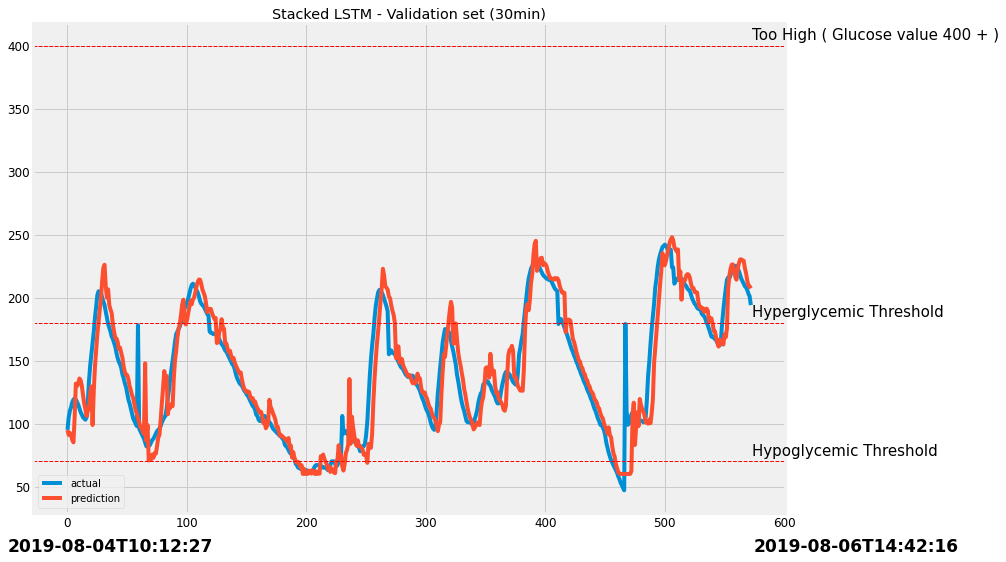

In [280]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_slstm_30_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_slstm_30_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_slstm_30_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_slstm_30_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Stacked LSTM - Validation set (30min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### Bidirectional LSTM - 30분

In [281]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [282]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50,activation='relu'),input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [283]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [284]:
K.clear_session()

In [285]:
val_bilstm_30_predict_result = model.predict(x_val_single,verbose=0)

for i in range(len(val_bilstm_30_predict_result)):
    if val_bilstm_30_predict_result[i] >= 400: 
        val_bilstm_30_predict_result[i]=400
    elif val_bilstm_30_predict_result[i] <= 60: 
        val_bilstm_30_predict_result[i]=60

print('Bidirectional LSTM - RMSE : ',RMSE(y_val_single,val_bilstm_30_predict_result))
val_bilstm_30 = RMSE(y_val_single,val_bilstm_30_predict_result)

Bidirectional LSTM - RMSE :  20.07381


In [286]:
get_val_bilstm_30_predict_result = np.array(val_bilstm_30_predict_result)

In [287]:
get_val_bilstm_30_predict_result = get_val_bilstm_30_predict_result.T

In [288]:
get_val_bilstm_30_predict_result.shape

(1, 573)

In [289]:
train_bilstm_30_predict_result = model.predict(x_train_single,verbose=0)

In [290]:
# 예측값 상한선 = 400 
for i in range(len(train_bilstm_30_predict_result)):
    if train_bilstm_30_predict_result[i] >= 400: 
        train_bilstm_30_predict_result[i]=400
    elif train_bilstm_30_predict_result[i] <= 60: 
        train_bilstm_30_predict_result[i]=60

In [291]:
get_train_bilstm_30_predict_result = np.array(train_bilstm_30_predict_result)

In [292]:
get_train_bilstm_30_predict_result = get_train_bilstm_30_predict_result.T

In [293]:
get_train_bilstm_30_predict_result.shape

(1, 1354)

#### Validation

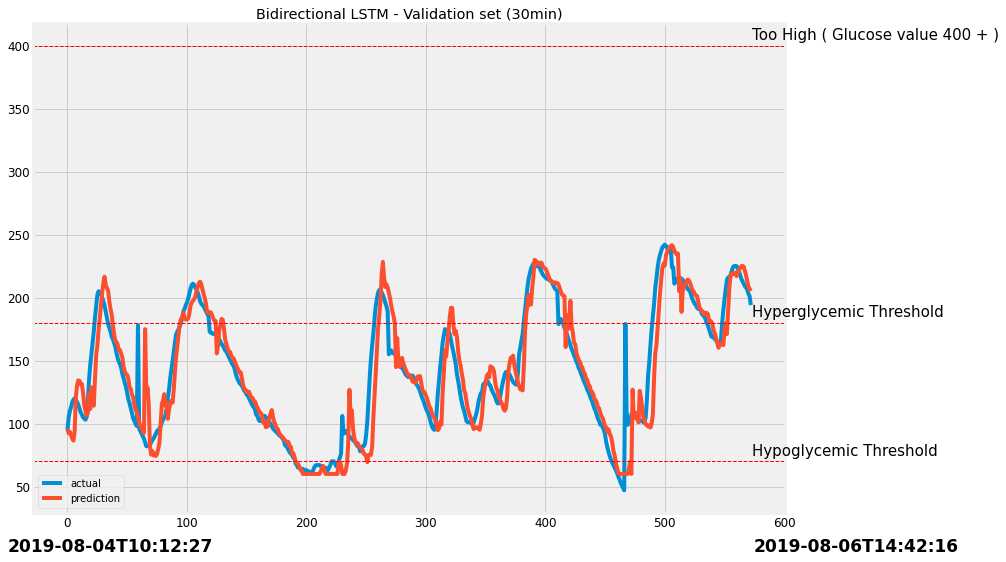

In [294]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_bilstm_30_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_bilstm_30_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_bilstm_30_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_bilstm_30_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Bidirectional LSTM - Validation set (30min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### GRU - 30분

In [295]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [296]:
from keras.layers import GRU
model = Sequential()
model.add(GRU(50,activation='relu',input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [297]:
model.summary()

model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                8250      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
_________________________________________________________________


In [298]:
val_gru_30_predict_result = model.predict(x_val_single,verbose=0)

for i in range(len(val_gru_30_predict_result)):
    if val_gru_30_predict_result[i] >= 400: 
        val_gru_30_predict_result[i]=400
    elif val_gru_30_predict_result[i] <= 60: 
        val_gru_30_predict_result[i]=60

#predict_result

#predict_result


print('GRU - RMSE 15min : ',RMSE(y_val_single,val_gru_30_predict_result))
val_gru_30 = RMSE(y_val_single,val_gru_30_predict_result)
# 상한선 400일 때 RMSE - 38.30 
# 상한선 400 X - 38.63

GRU - RMSE 15min :  19.016531


In [299]:
get_val_gru_30_predict_result = np.array(val_gru_30_predict_result)

In [300]:
get_val_gru_30_predict_result = get_val_gru_30_predict_result.T

In [301]:
get_val_gru_30_predict_result.shape

(1, 573)

In [302]:
train_gru_30_predict_result = model.predict(x_train_single,verbose=0)

In [303]:
# 예측값 상한선 = 400 
for i in range(len(train_gru_30_predict_result)):
    if train_gru_30_predict_result[i] >= 400: 
        train_gru_30_predict_result[i]=400
    elif train_gru_30_predict_result[i] <= 60: 
        train_gru_30_predict_result[i]=60

In [304]:
get_train_gru_30_predict_result = np.array(train_gru_30_predict_result)

In [305]:
get_train_gru_30_predict_result = get_train_gru_30_predict_result.T

In [306]:
get_train_gru_30_predict_result.shape

(1, 1354)

#### Validation

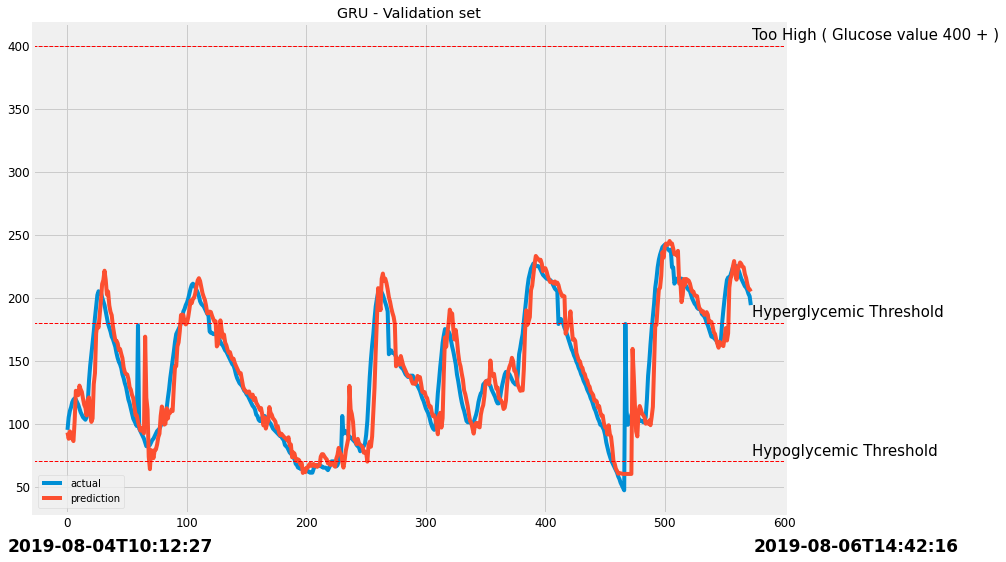

In [307]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_gru_30_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_gru_30_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_gru_30_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_gru_30_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('GRU - Validation set',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### GA_30

In [308]:
train_rnn_30_predict_result = np.asarray(train_rnn_30_predict_result)
train_lstm_30_predict_result = np.asarray(train_lstm_30_predict_result)
train_slstm_30_predict_result = np.asarray(train_slstm_30_predict_result)
train_bilstm_30_predict_result = np.asarray(train_bilstm_30_predict_result)
train_gru_30_predict_result = np.asarray(train_gru_30_predict_result)

In [309]:
val_rnn_30_predict_result = np.asarray(val_rnn_30_predict_result)
val_lstm_30_predict_result = np.asarray(val_lstm_30_predict_result)
val_slstm_30_predict_result = np.asarray(val_slstm_30_predict_result)
val_bilstm_30_predict_result = np.asarray(val_bilstm_30_predict_result)
val_gru_30_predict_result = np.asarray(val_gru_30_predict_result)

In [310]:
def evaluate2(X):
  pen = 0 
  #coef = [0,0,0,0,0]
  ab=0
  result =0
  #result2 = 0
  #print(X)
  if sum(X) > 0.99 and sum(X) < 1:
    #print("\n ** Count ** ")
    #print(count)
    #sum(coef)
    #pen = 2000 - sum(list1 * coef[0] + list2 * coef[1] + # 400 = 혈당측정기에서 수집한 EGV의 최댓값이 400
    #             list3 * coef[2] + list4 * coef[3] +
    #             list5 * coef[4])
    #RMSE(y_val_uni_origin,predict_result)
    #result = mean_squared_error((y_val_uni_origin,(val_rnn_30_predict_result * X[0] + val_lstm_30_predict_result * X[1] +
    #             val_slstm_30_predict_result * X[2] + val_bilstm_30_predict_result * X[3] +
    #             val_gru_30_predict_result * X[4]))**0.5)
   # ab = val_rnn_30_predict_result * X[0] + val_lstm_30_predict_result * X[1] +val_slstm_30_predict_result * X[2] + val_bilstm_30_predict_result * X[3] + val_gru_30_predict_result * X[4]
   # print("\n ** A ** \n")
   # print(ab.shape)
    result = 50 - np.sqrt(mean_squared_error(train_rnn_30_predict_result * X[0] + train_lstm_30_predict_result * X[1] +train_slstm_30_predict_result * X[2] + 
                                train_bilstm_30_predict_result * X[3] + train_gru_30_predict_result * X[4],y_train_single))

    
    
    #result = 10 - mean_squared_error(y_val_uni_origin,abc) / test_result 
    #result2=(test_result*5) - np.sqrt(result)
    #test_result =  mean_squared_error(y_val_uni_origin,ex)
    #test_result

    #pen = RMSE(y_val_uni_origin,result)
    #pen = 200 - np.sqrt(y_val_uni_origin,(val_rnn_15_predict_result * (X[0] / 10000) + val_lstm_15_predict_result * (X[1] / 10000) +
    #             val_slstm_15_predict_result * (X[2] / 10000) + val_bilstm_15_predict_result * (X[3] / 10000) +
    #             val_gru_15_predict_result * (X[4] / 10000)))
    # np.sqrt(mean_squared_error(y_test,y_predict))
    print("\n ** B ** \n")
    print(X)
    #print()
    print("\n ** C ** \n")
    print(result)
  #return np.sum(X) + pen
    #count += 1 
  return -result
    
    

In [311]:
varbound2 = np.array([[0.05, 0.5]]*5)

In [312]:
algorithm_param = {'max_num_iteration': 10000,
                   'population_size':100,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'selection_type': 'roulette',
                   'max_iteration_without_improv':None}

In [313]:
model2 = ga(function = evaluate2, dimension = 5, variable_type='real',variable_boundaries=varbound2,algorithm_parameters = algorithm_param)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.34214893]

 ** C ** 

36.413811683654785

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.34214893]

 ** C ** 

36.413811683654785

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.34214893]

 ** C ** 

36.413811683654785

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05396527 0.34214893]

 ** C ** 

36.402212142944336

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.34214893]

 ** C ** 

36.413811683654785

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.34214893]

 ** C ** 

36.413811683654785

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.34214893]

 ** C ** 

36.413811683654785

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.34214893]

 ** C ** 

36.413811683654785

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.34214893]

 ** C ** 

36.413811683654785

 ** B ** 

[0.05000333 0.05001579 0.49999604 0.05068796 0.342148

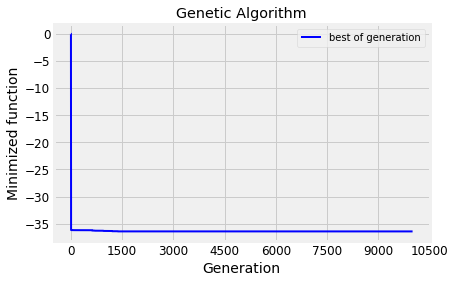

In [314]:
model2.run()

In [315]:
# RMSE 
optimized = val_rnn_30_predict_result * model2.output_dict['variable'][0] + val_lstm_30_predict_result *model2.output_dict['variable'][1] + val_slstm_30_predict_result * model2.output_dict['variable'][2] + val_bilstm_30_predict_result * model2.output_dict['variable'][3] + val_gru_30_predict_result * model2.output_dict['variable'][4]
for i in range(len(optimized)):
    if optimized[i] >= 400: 
        optimized[i]=400
    if optimized[i] <= 60: 
        optimized[i]=60
optimized_rmse_30 =  RMSE(y_val_single,optimized)
optimized_rmse_30

18.65137

In [316]:
get_optimized = np.array(optimized)

In [317]:
get_optimized = get_optimized.T

In [318]:
get_optimized.shape

(1, 573)

In [319]:
ar_val_30=np.concatenate((get_y_val_origin_30, get_val_rnn_30_predict_result,get_val_lstm_30_predict_result,get_val_slstm_30_predict_result,get_val_bilstm_30_predict_result,get_val_gru_30_predict_result,get_optimized), axis = 0)


In [320]:
ar_train_30 = np.concatenate((get_x_train_origin_30, get_train_rnn_30_predict_result ,get_train_lstm_30_predict_result ,get_train_slstm_30_predict_result,get_train_bilstm_30_predict_result,get_train_gru_30_predict_result),axis=0)

In [321]:
#ar_val_15=np.concatenate((get_y_val_origin, get_val_rnn_15_predict_result,get_val_lstm_15_predict_result,get_val_slstm_15_predict_result,get_val_bilstm_15_predict_result,get_val_gru_15_predict_result), axis = 0)


In [322]:
#ar_train_15 = np.concatenate((get_x_train_origin_15, get_train_rnn_15_predict_result ,get_train_lstm_15_predict_result ,get_train_slstm_15_predict_result,get_train_bilstm_15_predict_result,get_train_gru_15_predict_result),axis=0)

In [323]:
y1=pd.DataFrame(ar_val_30,index=['30_val_origin','30_val_rnn','30_val_lstm','30_val_slstm','30_val_bilstm','30_val_gru','30_optimized'])
y1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572
30_val_origin,95.000000,105.000000,110.000000,113.000000,117.000000,119.000000,120.000000,119.000000,117.000000,115.000000,112.000000,109.000000,107.000000,105.000000,104.000000,103.000000,105.000000,117.000000,134.000000,146.000000,155.000000,164.000000,173.000000,184.000000,193.000000,202.000000,205.000000,203.000000,204.000000,200.000000,197.000000,194.000000,189.000000,184.000000,179.000000,176.000000,173.000000,169.000000,167.000000,164.000000,161.000000,156.000000,152.000000,149.000000,147.000000,144.000000,139.000000,136.000000,132.000000,129.000000,124.000000,119.000000,116.000000,112.000000,108.000000,104.000000,102.000000,100.000000,98.000000,178.000000,96.000000,94.000000,92.000000,90.000000,88.000000,85.000000,82.000000,82.000000,82.000000,83.000000,85.000000,87.000000,88.000000,90.000000,92.000000,94.000000,95.000000,96.000000,98.000000,101.000000,103.000000,105.000000,106.000000,112.000000,120.000000,127.000000,136.000000,143.000000,150.000000,157.000000,165.000000,171.000000,173.000000,175.000000,177.000000,180.000000,184.000000,189.000000,191.000000,194.000000,196.000000,199.000000,203.000000,207.000000,210.000000,211.000000,210.000000,208.000000,206.000000,204.000000,201.000000,197.000000,195.000000,194.000000,193.000000,191.000000,189.000000,187.000000,186.000000,173.000000,172.000000,172.000000,171.000000,171.000000,171.000000,170.000000,168.000000,167.000000,165.000000,163.000000,162.000000,160.000000,158.000000,157.000000,155.000000,153.000000,151.000000,149.000000,147.000000,146.000000,143.000000,139.000000,136.000000,134.000000,132.000000,131.000000,130.000000,128.000000,126.000000,125.000000,123.000000,122.000000,120.000000,118.000000,116.000000,114.000000,113.000000,111.000000,107.000000,106.000000,103.000000,102.000000,102.000000,105.000000,106.000000,106.000000,105.000000,104.000000,103.000000,101.000000,100.000000,98.000000,96.000000,95.000000,94.000000,93.000000,92.000000,91.000000,90.000000,90.000000,88.000000,87.000000,83.000000,82.000000,81.000000,79.000000,77.000000,76.000000,75.000000,73.000000,72.000000,68.000000,67.000000,65.000000,6

In [324]:
y2=pd.DataFrame(ar_train_30,index=['30_train_origin','30_train_rnn','30_train_lstm','30_train_slstm','30_train_bilstm','30_train_gru'])
y2
#y.append(get_val_rnn_15_predict_result,ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353
30_train_origin,205.000000,208.000000,212.000000,213.000000,210.000000,212.000000,213.000000,215.000000,214.000000,212.000000,208.000000,204.000000,206.000000,206.000000,205.000000,202.000000,200.000000,198.000000,196.000000,193.000000,177.000000,192.000000,181.000000,178.000000,179.000000,179.000000,178.000000,176.000000,176.000000,176.000000,175.000000,173.000000,172.000000,170.000000,169.000000,169.000000,168.000000,165.000000,162.000000,160.000000,159.000000,158.000000,157.000000,156.000000,155.000000,152.000000,150.000000,148.000000,145.000000,143.000000,141.000000,138.000000,136.000000,134.000000,133.000000,132.000000,131.000000,129.000000,128.000000,127.000000,125.000000,123.000000,121.000000,119.000000,117.000000,115.000000,113.000000,111.000000,110.000000,108.000000,107.000000,106.000000,105.000000,105.000000,104.000000,103.000000,102.000000,101.000000,98.000000,96.000000,95.000000,93.000000,92.000000,91.000000,88.000000,87.000000,87.000000,86.000000,86.000000,85.000000,84.000000,83.000000,82.000000,80.000000,79.000000,78.000000,75.000000,75.000000,74.000000,73.000000,73.000000,72.000000,71.000000,69.000000,67.000000,66.000000,65.000000,64.000000,63.000000,63.000000,62.000000,61.000000,61.000000,60.000000,59.000000,59.000000,59.000000,59.000000,58.000000,57.000000,57.000000,57.000000,57.000000,55.000000,54.000000,53.000000,57.000000,62.000000,64.000000,80.000000,75.000000,80.000000,84.000000,88.000000,90.000000,90.000000,89.000000,87.000000,84.000000,85.000000,86.000000,87.000000,86.000000,82.000000,79.000000,79.000000,79.000000,80.000000,79.000000,78.000000,77.000000,78.000000,85.000000,93.000000,99.000000,103.000000,105.000000,107.000000,106.000000,105.000000,106.000000,106.000000,102.000000,99.000000,100.000000,98.000000,96.000000,93.000000,91.000000,89.000000,86.000000,83.000000,79.000000,75.000000,72.000000,69

## 60분

In [325]:
TRAIN_SPLIT=int(len(raw_seq)*0.7)
multi_past_history = 6
multi_future_target = 11
STEP=1
x_train_single, y_train_single = multi_data(dataset,dataset[:,0],0,TRAIN_SPLIT,
                                            multi_past_history,multi_future_target,STEP,single_step=True)
x_val_single, y_val_single = multi_data(dataset, dataset[:,0],TRAIN_SPLIT,
                                        None,multi_past_history,multi_future_target,STEP,single_step=True)

In [326]:
#x_train_uni[0]

In [327]:
#y_train_uni[0]

In [328]:
#df['Glucose'].head(20)

### RNN - 60분

In [329]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [330]:
model = Sequential()
model.add(SimpleRNN(50,activation='relu',input_shape=x_train_single.shape[-2:],return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

In [331]:
K.clear_session()

In [332]:
val_rnn_60_predict_result = model.predict(x_val_single,verbose=0)

# 예측값 상한선 = 400 
for i in range(len(val_rnn_60_predict_result)):
    if val_rnn_60_predict_result[i] >= 400: 
        val_rnn_60_predict_result[i]=400
    if val_rnn_60_predict_result[i] <= 60: 
        val_rnn_60_predict_result[i]=60

# Val set RMSE 
print(' Vanila RNN (Simple RNN) - RMSE (15min) : ',RMSE(y_val_single,val_rnn_60_predict_result))
val_rnn_60 = RMSE(y_val_single,val_rnn_60_predict_result)


 Vanila RNN (Simple RNN) - RMSE (15min) :  35.0191


In [333]:
get_x_train_origin_60 = np.array(y_train_single)

In [334]:
get_x_train_origin_60 = get_x_train_origin_60.reshape(1,len(y_train_single))

In [335]:
get_x_train_origin_60.shape

(1, 1354)

In [336]:
get_y_val_origin_60 = np.array(y_val_single)

In [337]:
get_y_val_origin_60 = get_y_val_origin_60.reshape(1,len(y_val_single))

In [338]:
get_y_val_origin_60.shape

(1, 567)

In [339]:
#get_y_val_origin

In [340]:
get_val_rnn_60_predict_result = np.array(val_rnn_60_predict_result)

In [341]:
get_val_rnn_60_predict_result = get_val_rnn_60_predict_result.T

In [342]:
get_val_rnn_60_predict_result.shape

(1, 567)

In [343]:
train_rnn_60_predict_result = model.predict(x_train_single,verbose=0)

In [344]:
# 예측값 상한선 = 400 
for i in range(len(train_rnn_60_predict_result)):
    if train_rnn_60_predict_result[i] >= 400: 
        train_rnn_60_predict_result[i]=400
    elif train_rnn_60_predict_result[i] <= 60: 
        train_rnn_60_predict_result[i]=60

In [345]:
get_train_rnn_60_predict_result = np.array(train_rnn_60_predict_result)

In [346]:
get_train_rnn_60_predict_result = get_train_rnn_60_predict_result.T

In [347]:
get_train_rnn_60_predict_result.shape

(1, 1354)

#### Validation

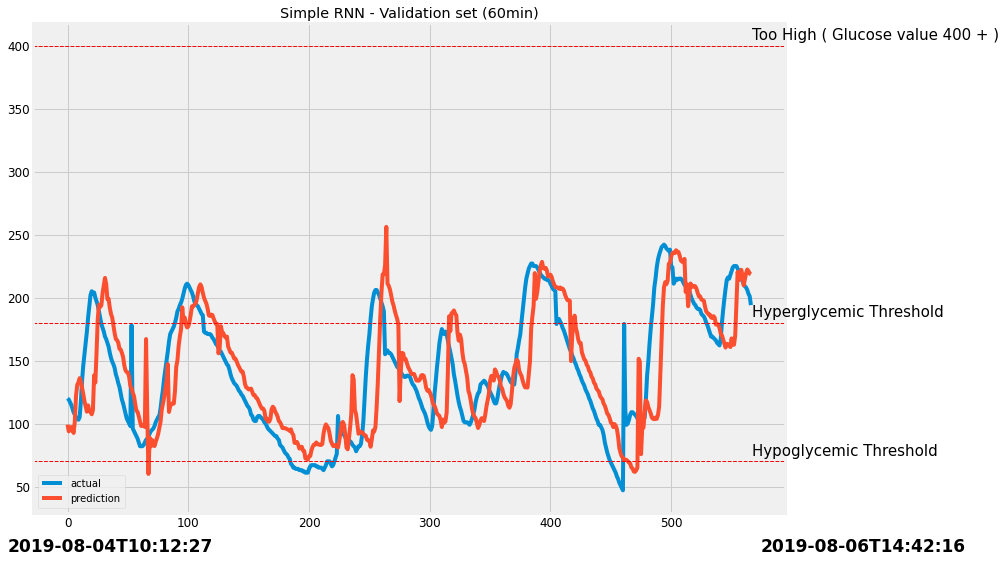

In [348]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_rnn_60_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_rnn_60_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_rnn_60_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_rnn_60_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Simple RNN - Validation set (60min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### LSTM - 60분

In [349]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [350]:
model = Sequential()
model.add(LSTM(50,activation='relu',input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))


model.compile(optimizer='adam',loss='mse')

model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

K.clear_session()

In [351]:
val_lstm_60_predict_result = model.predict(x_val_single,verbose=0)

# 예측값 상한선 = 400 
for i in range(len(val_lstm_60_predict_result)):
    if val_lstm_60_predict_result[i] >= 400: 
        val_lstm_60_predict_result[i]=400
    elif val_lstm_60_predict_result[i]<=60:
      val_lstm_60_predict_result[i]=60

#predict_result

print(' LSTM - RMSE (60min) : ',RMSE(y_val_single,val_lstm_60_predict_result))
val_lstm_60=RMSE(y_val_single,val_lstm_60_predict_result)

 LSTM - RMSE (60min) :  33.761997


In [352]:
get_val_lstm_60_predict_result = np.array(val_lstm_60_predict_result)

In [353]:
get_val_lstm_60_predict_result = get_val_lstm_60_predict_result.T

In [354]:
get_val_lstm_60_predict_result.shape

(1, 567)

In [355]:
train_lstm_60_predict_result = model.predict(x_train_single,verbose=0)

In [356]:
# 예측값 상한선 = 400 
for i in range(len(train_lstm_60_predict_result)):
    if train_lstm_60_predict_result[i] >= 400: 
        train_lstm_60_predict_result[i]=400
    elif train_lstm_60_predict_result[i] <= 60: 
        train_lstm_60_predict_result[i]=60

In [357]:
get_train_lstm_60_predict_result = np.array(train_lstm_60_predict_result)

In [358]:
get_train_lstm_60_predict_result = get_train_lstm_60_predict_result.T

In [359]:
get_train_lstm_60_predict_result.shape

(1, 1354)

#### Validation

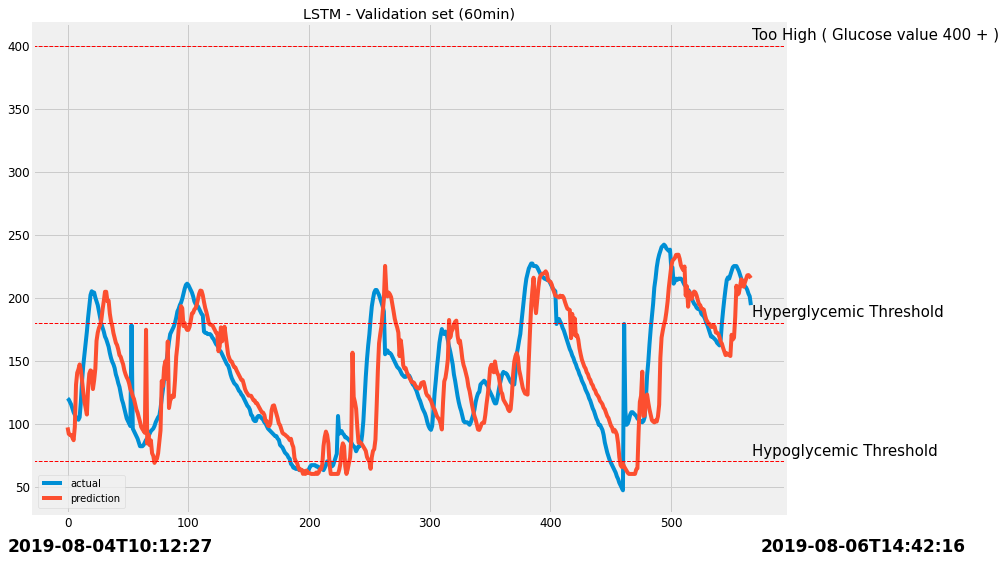

In [360]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_lstm_60_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_lstm_60_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_lstm_60_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_lstm_60_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('LSTM - Validation set (60min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### Stacked LSTM - 60분

In [361]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [362]:
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=x_train_single.shape[-2:]))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [363]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

K.clear_session()

In [364]:
val_slstm_60_predict_result = model.predict(x_val_single,verbose=0)


for i in range(len(val_slstm_60_predict_result)):
    if val_slstm_60_predict_result[i] >= 400: 
        val_slstm_60_predict_result[i]=400
    elif val_slstm_60_predict_result[i] <= 60: 
        val_slstm_60_predict_result[i]=60

print(' Stacked LSTM - RMSE(15min) : ',RMSE(y_val_single,val_slstm_60_predict_result))
val_stacklstm_60 =RMSE(y_val_single,val_slstm_60_predict_result)

 Stacked LSTM - RMSE(15min) :  34.416965


In [365]:
get_val_slstm_60_predict_result = np.array(val_slstm_60_predict_result)

In [366]:
get_val_slstm_60_predict_result = get_val_slstm_60_predict_result.T

In [367]:
get_val_slstm_60_predict_result.shape

(1, 567)

In [368]:
train_slstm_60_predict_result = model.predict(x_train_single,verbose=0)

In [369]:
# 예측값 상한선 = 400 
for i in range(len(train_slstm_60_predict_result)):
    if train_slstm_60_predict_result[i] >= 400: 
        train_slstm_60_predict_result[i]=400
    if train_slstm_60_predict_result[i] <= 60: 
        train_slstm_60_predict_result[i]=60

In [370]:
get_train_slstm_60_predict_result = np.array(train_slstm_60_predict_result)

In [371]:
get_train_slstm_60_predict_result = get_train_slstm_60_predict_result.T

In [372]:
get_train_slstm_60_predict_result.shape

(1, 1354)

#### Validation

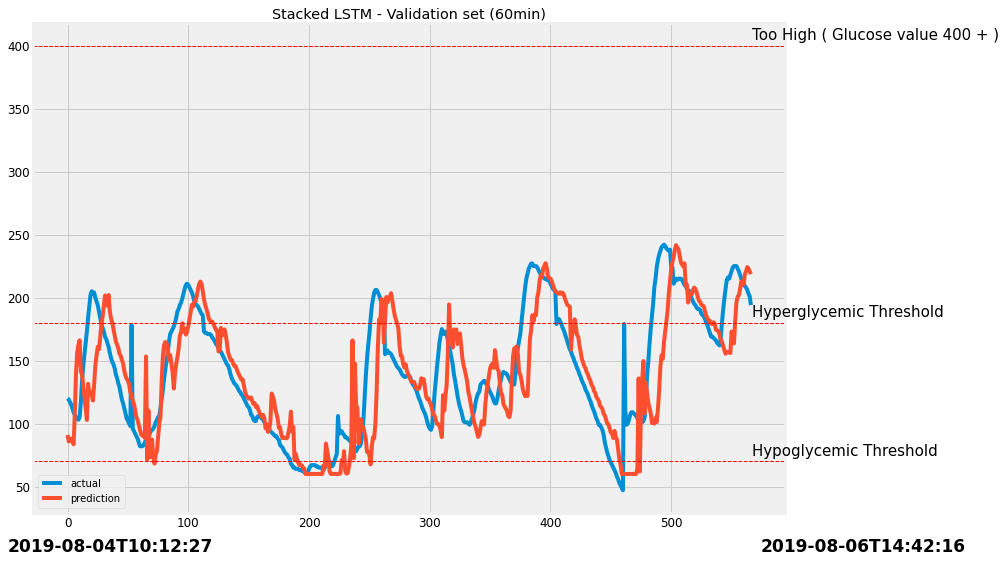

In [373]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_slstm_60_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_slstm_60_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_slstm_60_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_slstm_60_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Stacked LSTM - Validation set (60min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### Bidirectional LSTM - 60분

In [374]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [375]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50,activation='relu'),input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [376]:
model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

K.clear_session()

In [377]:
val_bilstm_60_predict_result = model.predict(x_val_single,verbose=0)

for i in range(len(val_bilstm_60_predict_result)):
    if val_bilstm_60_predict_result[i] >= 400: 
        val_bilstm_60_predict_result[i]=400
    elif val_bilstm_60_predict_result[i] <= 60: 
        val_bilstm_60_predict_result[i]=60

print('Bidirectional LSTM - RMSE : ',RMSE(y_val_single,val_bilstm_60_predict_result))
val_bilstm_60 = RMSE(y_val_single,val_bilstm_60_predict_result)

Bidirectional LSTM - RMSE :  34.055412


In [378]:
get_val_bilstm_60_predict_result = np.array(val_bilstm_60_predict_result)

In [379]:
get_val_bilstm_60_predict_result = get_val_bilstm_60_predict_result.T

In [380]:
get_val_bilstm_60_predict_result.shape

(1, 567)

In [381]:
train_bilstm_60_predict_result = model.predict(x_train_single,verbose=0)

In [382]:
# 예측값 상한선 = 400 
for i in range(len(train_bilstm_60_predict_result)):
    if train_bilstm_60_predict_result[i] >= 400: 
        train_bilstm_60_predict_result[i]=400
    elif train_bilstm_60_predict_result[i] <= 60: 
        train_bilstm_60_predict_result[i]=60

In [383]:
get_train_bilstm_60_predict_result = np.array(train_bilstm_60_predict_result)

In [384]:
get_train_bilstm_60_predict_result = get_train_bilstm_60_predict_result.T

In [385]:
get_train_bilstm_60_predict_result.shape

(1, 1354)

#### Validation

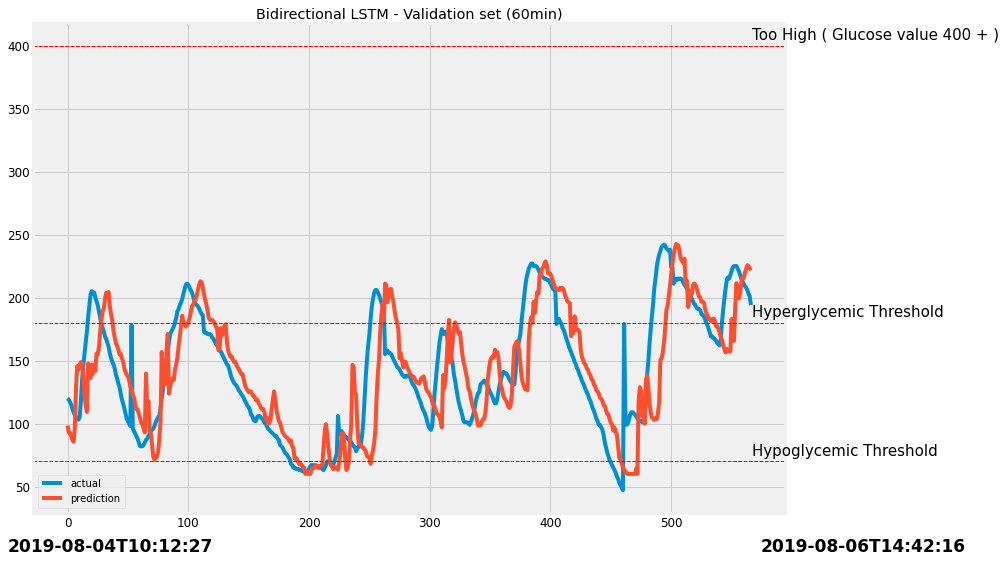

In [386]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_bilstm_60_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_bilstm_60_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_bilstm_60_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_bilstm_60_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('Bidirectional LSTM - Validation set (60min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### GRU - 60분

In [387]:
# 재현 가능한 결과를 만들기 위해 
# 매번 반복해야 하는 작업 
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                             inter_op_parallelism_threads=1)
sess=tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(),config=session_conf)
K.set_session(sess)

In [388]:
from keras.layers import GRU
model = Sequential()
model.add(GRU(50,activation='relu',input_shape=x_train_single.shape[-2:]))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [389]:
model.summary()

model.fit(x_train_single,y_train_single,epochs=300,verbose=0)

K.clear_session()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                8250      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
_________________________________________________________________


In [390]:
val_gru_60_predict_result = model.predict(x_val_single,verbose=0)

for i in range(len(val_gru_60_predict_result)):
    if val_gru_60_predict_result[i] >= 400: 
        val_gru_60_predict_result[i]=400
    elif val_gru_60_predict_result[i] <= 60: 
        val_gru_60_predict_result[i]=60

#predict_result

#predict_result


print('GRU - RMSE 15min : ',RMSE(y_val_single,val_gru_60_predict_result))
val_gru_60 = RMSE(y_val_single,val_gru_60_predict_result)
# 상한선 400일 때 RMSE - 38.30 
# 상한선 400 X - 38.63

GRU - RMSE 15min :  34.69572


In [391]:
get_val_gru_60_predict_result = np.array(val_gru_60_predict_result)

In [392]:
get_val_gru_60_predict_result = get_val_gru_60_predict_result.T

In [393]:
get_val_gru_60_predict_result.shape

(1, 567)

In [394]:
train_gru_60_predict_result = model.predict(x_train_single,verbose=0)

In [395]:
# 예측값 상한선 = 400 
for i in range(len(train_gru_60_predict_result)):
    if train_gru_60_predict_result[i] >= 400: 
        train_gru_60_predict_result[i]=400
    elif train_gru_60_predict_result[i] <= 60: 
        train_gru_60_predict_result[i]=60

In [396]:
get_train_gru_60_predict_result = np.array(train_gru_60_predict_result)

In [397]:
get_train_gru_60_predict_result = get_train_gru_60_predict_result.T

In [398]:
get_train_gru_60_predict_result.shape

(1, 1354)

#### Validation

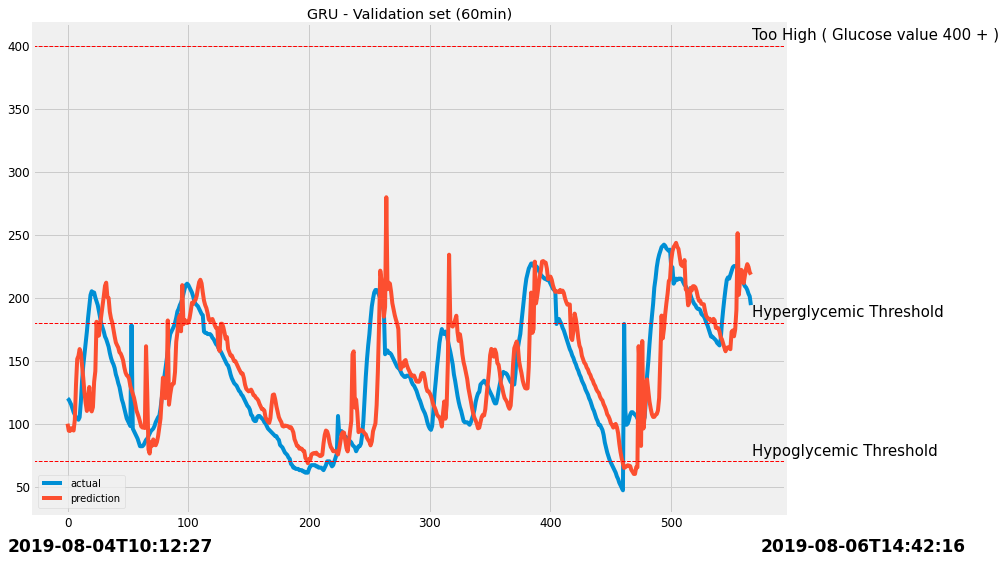

In [399]:
# 테스트셋
plt.figure(figsize=(12,9))
plt.plot(y_val_single,label='actual')
plt.plot(val_gru_60_predict_result,label='prediction')
plt.axhline(y=70,c='r',linestyle='--',linewidth=1)
plt.axhline(y=180,c='r',linestyle='--',linewidth=1)
plt.axhline(y=400,c='r',linestyle='--',linewidth=1)
plt.text(len(val_gru_60_predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(len(val_gru_60_predict_result),185,'Hyperglycemic Threshold',family='Times New Roman',size=15)
#plt.text(len(predict_result),75,'Hypoglycemic Threshold',family='Times New Roman',size=15)
plt.text(-50,-1,df['Timestamp'][TRAIN_SPLIT],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(df['Timestamp'])-TRAIN_SPLIT-10,-1,df['Timestamp'][len(df['Timestamp'])-1],family='Times New Roman',fontweight='bold',size=17)
plt.text(len(val_gru_60_predict_result),405,'Too High ( Glucose value 400 + )',family='Times New Roman',size=15)
plt.title('GRU - Validation set (60min)',family='Times New Roman')
plt.legend(loc='best')

plt.show()

### GA_60

In [400]:
val_rnn_60_predict_result = np.asarray(val_rnn_60_predict_result)
val_lstm_60_predict_result = np.asarray(val_lstm_60_predict_result)
val_slstm_60_predict_result = np.asarray(val_slstm_60_predict_result)
val_bilstm_60_predict_result = np.asarray(val_bilstm_60_predict_result)
val_gru_60_predict_result = np.asarray(val_gru_60_predict_result)

In [401]:
train_rnn_60_predict_result = np.asarray(train_rnn_60_predict_result)
train_lstm_60_predict_result = np.asarray(train_lstm_60_predict_result)
train_slstm_60_predict_result = np.asarray(train_slstm_60_predict_result)
train_bilstm_60_predict_result = np.asarray(train_bilstm_60_predict_result)
train_gru_60_predict_result = np.asarray(train_gru_60_predict_result)

In [402]:
def evaluate2(X):
  pen = 0 
  #coef = [0,0,0,0,0]
  ab=0
  result =0
  #result2 = 0
  #print(X)
  if sum(X) > 0.99 and sum(X) < 1:
    #print("\n ** Count ** ")
    #print(count)
    #sum(coef)
    #pen = 2000 - sum(list1 * coef[0] + list2 * coef[1] + # 400 = 혈당측정기에서 수집한 EGV의 최댓값이 400
    #             list3 * coef[2] + list4 * coef[3] +
    #             list5 * coef[4])
    #RMSE(y_val_uni_origin,predict_result)
    #result = mean_squared_error((y_val_uni_origin,(val_rnn_30_predict_result * X[0] + val_lstm_30_predict_result * X[1] +
    #             val_slstm_30_predict_result * X[2] + val_bilstm_30_predict_result * X[3] +
    #             val_gru_30_predict_result * X[4]))**0.5)
   # ab = val_rnn_30_predict_result * X[0] + val_lstm_30_predict_result * X[1] +val_slstm_30_predict_result * X[2] + val_bilstm_30_predict_result * X[3] + val_gru_30_predict_result * X[4]
   # print("\n ** A ** \n")
   # print(ab.shape)
    result = 100 - np.sqrt(mean_squared_error(train_rnn_60_predict_result * X[0] + train_lstm_60_predict_result * X[1] +train_slstm_60_predict_result * X[2] + 
                                train_bilstm_60_predict_result * X[3] + train_gru_60_predict_result * X[4],y_train_single))
    
    #result = 10 - mean_squared_error(y_val_uni_origin,abc) / test_result 
    #result2=(test_result*5) - np.sqrt(result)
    #test_result =  mean_squared_error(y_val_uni_origin,ex)
    #test_result

    #pen = RMSE(y_val_uni_origin,result)
    #pen = 200 - np.sqrt(y_val_uni_origin,(val_rnn_15_predict_result * (X[0] / 10000) + val_lstm_15_predict_result * (X[1] / 10000) +
    #             val_slstm_15_predict_result * (X[2] / 10000) + val_bilstm_15_predict_result * (X[3] / 10000) +
    #             val_gru_15_predict_result * (X[4] / 10000)))
    # np.sqrt(mean_squared_error(y_test,y_predict))
    print("\n ** B ** \n")
    print(X)
    #print()
    print("\n ** C ** \n")
    print(result)
  #return np.sum(X) + pen
    #count += 1 
  return -result
    
    

In [403]:
varbound2 = np.array([[0.05, 0.5]]*5)

In [404]:
algorithm_param = {'max_num_iteration': 10000,
                   'population_size':100,
                   'mutation_probability':0.1,
                   'elit_ratio': 0.01,
                   'crossover_probability': 0.5,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'selection_type': 'roulette',
                   'max_iteration_without_improv':None}

In [405]:
model3 = ga(function = evaluate2, dimension = 5, variable_type='real',variable_boundaries=varbound2,algorithm_parameters = algorithm_param)

In [ ]:
model3.run()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

 ** C ** 

76.60396957397461

 ** B ** 

[0.05349693 0.18209325 0.49393556 0.21912754 0.05124111]

 ** C ** 

76.60439491271973

 ** B ** 

[0.05349693 0.18209325 0.49393556 0.21912754 0.05124111]

 ** C ** 

76.60439491271973

 ** B ** 

[0.05349693 0.18209325 0.49393556 0.21910242 0.05124111]

 ** C ** 

76.60418891906738

 ** B ** 

[0.05349693 0.18209325 0.49393556 0.21912754 0.05124111]

 ** C ** 

76.60439491271973

 ** B ** 

[0.05349693 0.18209325 0.49393556 0.21912754 0.05124111]

 ** C ** 

76.60439491271973

 ** B ** 

[0.05349693 0.18209325 0.49393556 0.2190756  0.05124111]

 ** C ** 

76.60396957397461

 ** B ** 

[0.05349693 0.18209325 0.49393556 0.21912754 0.05124111]

 ** C ** 

76.60439491271973

 ** B ** 

[0.05349693 0.18209325 0.49314615 0.2190756  0.05124111]

 ** C ** 

76.5969009399414

 ** B ** 

[0.05349693 0.18209325 0.49393556 0.21912754 0.05124111]

 ** C ** 

76.60439491271973

 ** B ** 

[0.05349693 0.18209325 0.4939355

In [ ]:
# RMSE 
optimized = val_rnn_60_predict_result * model3.output_dict['variable'][0] + val_lstm_60_predict_result *model3.output_dict['variable'][1] + val_slstm_60_predict_result * model3.output_dict['variable'][2] + val_bilstm_60_predict_result * model3.output_dict['variable'][3] + val_gru_60_predict_result * model3.output_dict['variable'][4]
for i in range(len(optimized)):
    if optimized[i] >= 400: 
        optimized[i]=400
    if optimized[i] <= 60: 
        optimized[i]=60
optimized_rmse_60 =  RMSE(y_val_single,optimized)
optimized_rmse_60

In [ ]:
get_optimized = np.array(optimized)

In [ ]:
get_optimized = get_optimized.T

In [ ]:
get_optimized.shape

In [ ]:
ar_val_60=np.concatenate((get_y_val_origin_60, get_val_rnn_60_predict_result,get_val_lstm_60_predict_result,get_val_slstm_60_predict_result,get_val_bilstm_60_predict_result,get_val_gru_60_predict_result,get_optimized), axis = 0)


In [ ]:
ar_train_60 = np.concatenate((get_x_train_origin_60, get_train_rnn_60_predict_result ,get_train_lstm_60_predict_result ,get_train_slstm_60_predict_result,get_train_bilstm_60_predict_result,get_train_gru_60_predict_result),axis=0)

In [ ]:
#ar_val_15=np.concatenate((get_y_val_origin, get_val_rnn_15_predict_result,get_val_lstm_15_predict_result,get_val_slstm_15_predict_result,get_val_bilstm_15_predict_result,get_val_gru_15_predict_result), axis = 0)


In [ ]:
#ar_train_15 = np.concatenate((get_x_train_origin_15, get_train_rnn_15_predict_result ,get_train_lstm_15_predict_result ,get_train_slstm_15_predict_result,get_train_bilstm_15_predict_result,get_train_gru_15_predict_result),axis=0)

In [ ]:
y1=pd.DataFrame(ar_val_60,index=['60_val_origin','60_val_rnn','60_val_lstm','60_val_slstm','60_val_bilstm','60_val_gru','60_optimized'])
y1

In [ ]:
y2=pd.DataFrame(ar_train_60,index=['60_train_origin','60_train_rnn','60_train_lstm','60_train_slstm','60_train_bilstm','60_train_gru'])
y2
#y.append(get_val_rnn_15_predict_result,ignore_index=True)

## 결과

In [ ]:
#train_15_result = [train_rnn_15,train_lstm_15,train_stacklstm_15,train_bilstm_15,train_gru_15]
val_15_result =[val_rnn_15,val_lstm_15,val_stacklstm_15,val_bilstm_15,val_gru_15,optimized_rmse_15]
#train_30_result = [train_rnn_30,train_lstm_30,train_stacklstm_30,train_bilstm_30,train_gru_30]
val_30_result =[val_rnn_30,val_lstm_30,val_stacklstm_30,val_bilstm_30,val_gru_30,optimized_rmse_30]
#train_60_result = [train_rnn_60,train_lstm_60,train_stacklstm_60,train_bilstm_60,train_gru_60]
val_60_result =[val_rnn_60,val_lstm_60,val_stacklstm_60,val_bilstm_60,val_gru_60,optimized_rmse_60]


In [ ]:
val_rnn_result = [val_rnn_15,val_rnn_30,val_rnn_60]
val_lstm_result = [val_lstm_15,val_lstm_30,val_lstm_60]
val_stacklstm_result = [val_stacklstm_15,val_stacklstm_30,val_stacklstm_60]
val_bilstm_result = [val_bilstm_15,val_bilstm_30,val_bilstm_60]
val_gru_result = [val_gru_15,val_gru_30,val_gru_60]
val_optimized_result = [optimized_rmse_15,optimized_rmse_30,optimized_rmse_60]

In [ ]:
#train_rnn_result = [train_rnn_15,train_rnn_30,train_rnn_60]
#train_lstm_result = [train_lstm_15,train_lstm_30,train_lstm_60]
#train_stacklstm_result = [train_stacklstm_15,train_stacklstm_30,train_stacklstm_60]
#train_bilstm_result = [train_bilstm_15,train_bilstm_30,train_bilstm_60]
#train_gru_result = [train_gru_15,train_gru_30,train_gru_60]

In [ ]:
#train_result_list =[train_rnn_result,train_lstm_result,train_stacklstm_result,train_bilstm_result,train_gru_result]

In [ ]:
val_result_list =[val_rnn_result,val_lstm_result,val_stacklstm_result,val_bilstm_result,val_gru_result,val_optimized_result]

In [ ]:
val_result_list

In [ ]:
val_df = pd.DataFrame(index=['RNN','LSTM','Stacked LSTM','Bidirectional LSTM','GRU','Optimized'], 
                      columns =['15 MIN','30 MIN','60 MIN'],data=val_result_list)
val_df

In [ ]:
#train_df = pd.DataFrame(index=['RNN','LSTM','Stacked LSTM','Bidirectional LSTM','GRU'], 
#                      columns =['15 MIN','30 MIN','60 MIN'],data=train_result_list)
#train_df

## CNN LSTM